# Classification report - Unbiased Models

### Target dataset

In [1]:
TARGET_DATASET = 'TwReyes2013'
# Get project root
path = !pwd
report_path = '{}/{}/{}'.format('/'.join(path[0].split('/')[:-1]), 'reports', TARGET_DATASET)
TARGET_DATASET

'TwReyes2013'

### Lista dei file di report relativi alla feature testuale bow

In [2]:
import os
import re
def read_file_list(target_text_feature):
	return [file for file in os.listdir(report_path)
			if file.split('.')[-1] == 'json' and re.match(target_text_feature, file)]
report_file_list_bow = read_file_list('bow')
sorted(report_file_list_bow)

['bow$BayesianNetworks.json',
 'bow$DecisionTreeClassifier.json',
 'bow$MultinomialNB.json',
 'bow$SVC_linear.json',
 'bow$SVC_rbf.json',
 'bow-emot$BayesianNetworks.json',
 'bow-emot$DecisionTreeClassifier.json',
 'bow-emot$MultinomialNB.json',
 'bow-emot$SVC_linear.json',
 'bow-emot$SVC_rbf.json',
 'bow-pos$BayesianNetworks.json',
 'bow-pos$DecisionTreeClassifier.json',
 'bow-pos$MultinomialNB.json',
 'bow-pos$SVC_linear.json',
 'bow-pos$SVC_rbf.json',
 'bow-pos-emot$BayesianNetworks.json',
 'bow-pos-emot$DecisionTreeClassifier.json',
 'bow-pos-emot$MultinomialNB.json',
 'bow-pos-emot$SVC_linear.json',
 'bow-pos-emot$SVC_rbf.json',
 'bow-pp$BayesianNetworks.json',
 'bow-pp$DecisionTreeClassifier.json',
 'bow-pp$MultinomialNB.json',
 'bow-pp$SVC_linear.json',
 'bow-pp$SVC_rbf.json',
 'bow-pp-emot$BayesianNetworks.json',
 'bow-pp-emot$DecisionTreeClassifier.json',
 'bow-pp-emot$MultinomialNB.json',
 'bow-pp-emot$SVC_linear.json',
 'bow-pp-emot$SVC_rbf.json',
 'bow-pp-pos$BayesianNetwor

### Lista dei file di report senza features testuali

In [3]:
def read_file_list_nobow():
    return [file for file in os.listdir(report_path)
            if file.split('$')[0].split('-')[0] not in ['bow', 'bert', 'sbert']
            and file.split('.')[-1] == 'json']
report_file_list_nobow = read_file_list_nobow()
sorted(report_file_list_nobow)


['emot$BayesianNetworks.json',
 'emot$DecisionTreeClassifier.json',
 'emot$MultinomialNB.json',
 'emot$SVC_linear.json',
 'emot$SVC_rbf.json',
 'pos$BayesianNetworks.json',
 'pos$DecisionTreeClassifier.json',
 'pos$MultinomialNB.json',
 'pos$SVC_linear.json',
 'pos$SVC_rbf.json',
 'pos-emot$BayesianNetworks.json',
 'pos-emot$DecisionTreeClassifier.json',
 'pos-emot$MultinomialNB.json',
 'pos-emot$SVC_linear.json',
 'pos-emot$SVC_rbf.json',
 'pp$BayesianNetworks.json',
 'pp$DecisionTreeClassifier.json',
 'pp$MultinomialNB.json',
 'pp$SVC_linear.json',
 'pp$SVC_rbf.json',
 'pp-emot$BayesianNetworks.json',
 'pp-emot$DecisionTreeClassifier.json',
 'pp-emot$MultinomialNB.json',
 'pp-emot$SVC_linear.json',
 'pp-emot$SVC_rbf.json',
 'pp-pos$BayesianNetworks.json',
 'pp-pos$DecisionTreeClassifier.json',
 'pp-pos$MultinomialNB.json',
 'pp-pos$SVC_linear.json',
 'pp-pos$SVC_rbf.json',
 'pp-pos-emot$BayesianNetworks.json',
 'pp-pos-emot$DecisionTreeClassifier.json',
 'pp-pos-emot$MultinomialNB.js

In [4]:
from pandas import json_normalize
import json

CLASSIFIER_NAME = {
	'DecisionTreeClassifier': 'DecisionTree',
	'SVC_linear': 'SVM - Linear',
	#'SVC_rbf': 'SVM - rbf',
	'MultinomialNB': 'MultinomialNB',
	'BayesianNetworks': 'BayesianNetworks'
}
# Read all data
def read_report_file(report_file_list):	
    report_list = []
    for report_file in report_file_list:	
        with open('{}/{}'.format(report_path, report_file)) as file:
            data = json.load(file)
            classifier = report_file.split('$')[1].split('.')[0]
            if classifier not in CLASSIFIER_NAME.keys():
                continue
            # Save data
            out = dict()
            out['classifier'] = CLASSIFIER_NAME[classifier]
            out['features'] = data['features']
            out['confusion-matrix'] = data['overall']['confusion-matrix']
            out.update(data['overall']['report'])
            report_list.append(out)
    # Radix sort
    report_list.sort(key=lambda x: x['classifier'])
    report_list.sort(key=lambda x: x['features'])
    report_list.sort(key=lambda x: len(x['features'].split('-')))
    return report_list

### Dataframe Bow

In [5]:
report_bow = read_report_file(report_file_list_bow)
df_bow = json_normalize(report_bow)
df_bow.head()

,classifier,features,confusion-matrix,accuracy,False.precision,False.recall,False.f1-score,False.support,True.precision,True.recall,True.f1-score,True.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support
0,BayesianNetworks,bow,"[[2713.4, 286.6], [427.3, 572.7]]",0.821525,0.863979,0.904467,0.883740,3000.0,0.666676,0.572700,0.615947,1000.0,0.814653,0.821525,0.816792,4000.0,NaN,NaN,NaN,NaN
1,DecisionTree,bow,"[[26678.0, 3322.0], [3517.0, 6483.0]]",0.829025,0.883541,0.889267,0.886377,30000.0,0.661351,0.648324,0.654644,10000.0,0.828017,0.829025,0.828452,40000.0,0.772446,0.768796,0.770510,40000.0
2,MultinomialNB,bow,"[[26857.0, 3143.0], [2995.0, 7005.0]]",0.846550,0.899675,0.895220,0.897426,30000.0,0.690547,0.700491,0.695375,10000.0,0.847395,0.846550,0.846920,40000.0,0.795111,0.797856,0.796400,40000.0
3,SVM - Linear,bow,"[[27643.0, 2357.0], [3650.0, 6350.0]]",0.849825,0.883367,0.921422,0.901983,30000.0,0.729515,0.634925,0.678831,10000.0,0.844904,0.849825,0.846210,40000.0,0.806441,0.778173,0.790407,40000.0
4,BayesianNetworks,bow-emot,"[[2699.5, 300.5], [420.7, 579.3]]",0.819700,0.865199,0.899833,0.882155,3000.0,0.658711,0.579300,0.616272,1000.0,0.813577,0.819700,0.815684,4000.0,NaN,NaN,NaN,NaN


### Dataframe no Bow

In [6]:
report_nobow = read_report_file(report_file_list_nobow)
df_nobow = json_normalize(report_nobow)
df_nobow.head()

,classifier,features,confusion-matrix,accuracy,False.precision,False.recall,False.f1-score,False.support,True.precision,True.recall,True.f1-score,True.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support
0,BayesianNetworks,emot,"[[2905.6, 94.4], [924.2, 75.8]]",0.745350,0.758682,0.968533,0.850858,3000.0,0.446086,0.075800,0.129509,1000.0,0.680533,0.745350,0.670521,4000.0,NaN,NaN,NaN,NaN
1,DecisionTree,emot,"[[28183.0, 1817.0], [8434.0, 1566.0]]",0.743725,0.769681,0.939434,0.846115,30000.0,0.462625,0.156626,0.233838,10000.0,0.692944,0.743725,0.693048,40000.0,0.616153,0.54803,0.539977,40000.0
2,MultinomialNB,emot,"[[29416.0, 584.0], [9563.0, 437.0]]",0.746325,0.754654,0.980523,0.852885,30000.0,0.430808,0.043677,0.079227,10000.0,0.673662,0.746325,0.659491,40000.0,0.592731,0.51210,0.466056,40000.0
3,SVM - Linear,emot,"[[30000.0, 0.0], [10000.0, 0.0]]",0.750000,0.750000,1.000000,0.857138,30000.0,0.000000,0.000000,0.000000,10000.0,0.562513,0.750000,0.642862,40000.0,0.375000,0.50000,0.428569,40000.0
4,BayesianNetworks,pos,"[[2601.2, 398.8], [604.1, 395.9]]",0.749275,0.811539,0.867067,0.838377,3000.0,0.498215,0.395900,0.441146,1000.0,0.733208,0.749275,0.739070,4000.0,NaN,NaN,NaN,NaN


## Features a confronto
### Weighted average
- Precision
- Recall
- F1 score
- Accuracy

In [7]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
%matplotlib inline

FONTSIZE = 20
FONTSIZE_TITLE = 24
Y_SIZE = 14
plt.rc('font', size=FONTSIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONTSIZE_TITLE)     # fontsize of the axes title
colors = get_cmap("Set1").colors

reports_list = ['weighted avg.precision', 'weighted avg.recall', 'weighted avg.f1-score', 'accuracy']
report_dict = {'weighted avg.precision': 'Precision',
			   'weighted avg.recall': 'Recall',
			   'weighted avg.f1-score': 'F1',
			   'accuracy': 'Accuracy'}

def evaluate_features_data(df, classifier):
	plot_values = []
	for feature in features_list:
		values = []
		for report in reports_list:
			value = df[((df['features'] == feature) & (df['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_features(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, Y_SIZE))
	bar_width = 0.75
	indx = np.arange(len(features_list)) * 4.5
	yndx = [round(x, 3) for x in np.arange(0, 1.025, 0.025)]
	# Data
	for i, (values, report, color) in enumerate(zip(plot_values, reports_list, colors)):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=report_dict[report])
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	min_value = 0.55
	plt.ylim(min_value - min_value * 0.1, 1.03)
	# Legend
	ax.legend(loc='best')
	# Show
	plt.title(classifier_name, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	plt.show()

### Features con BOW

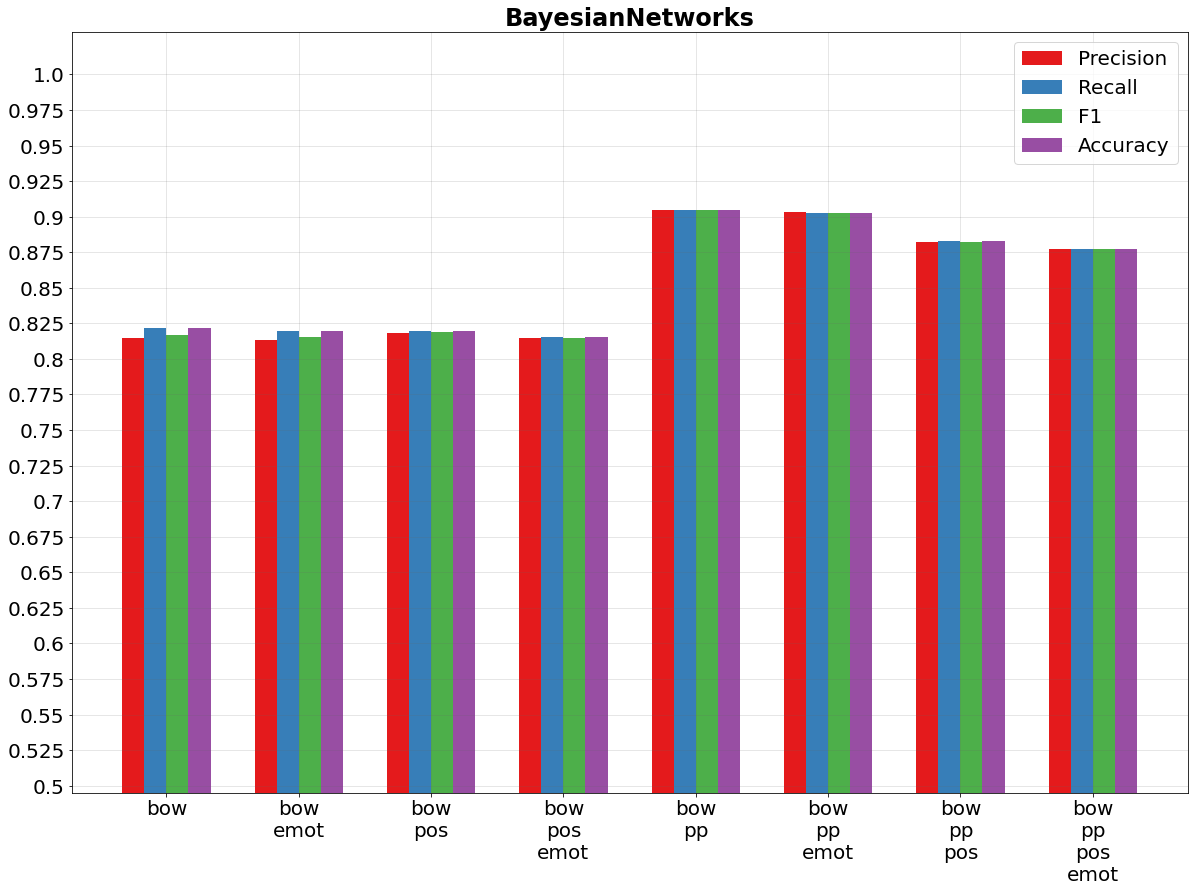

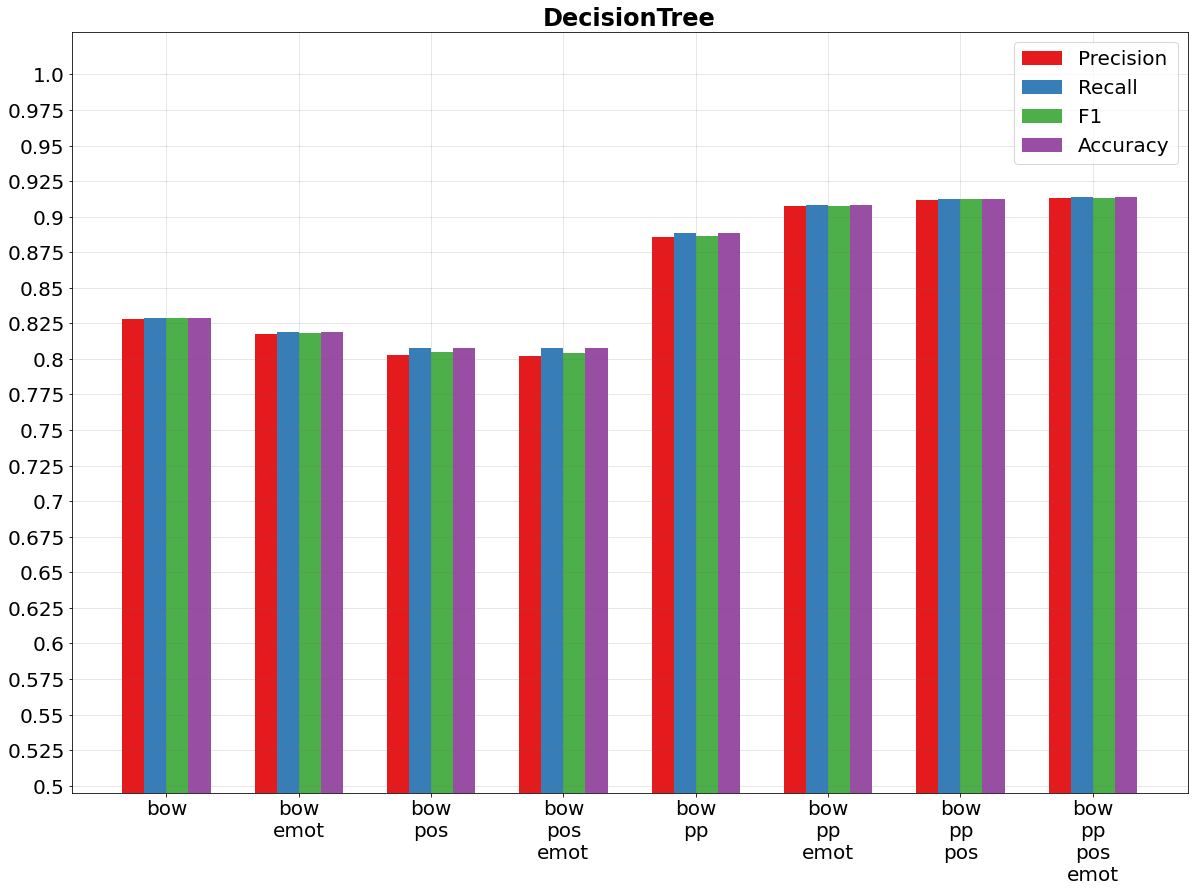

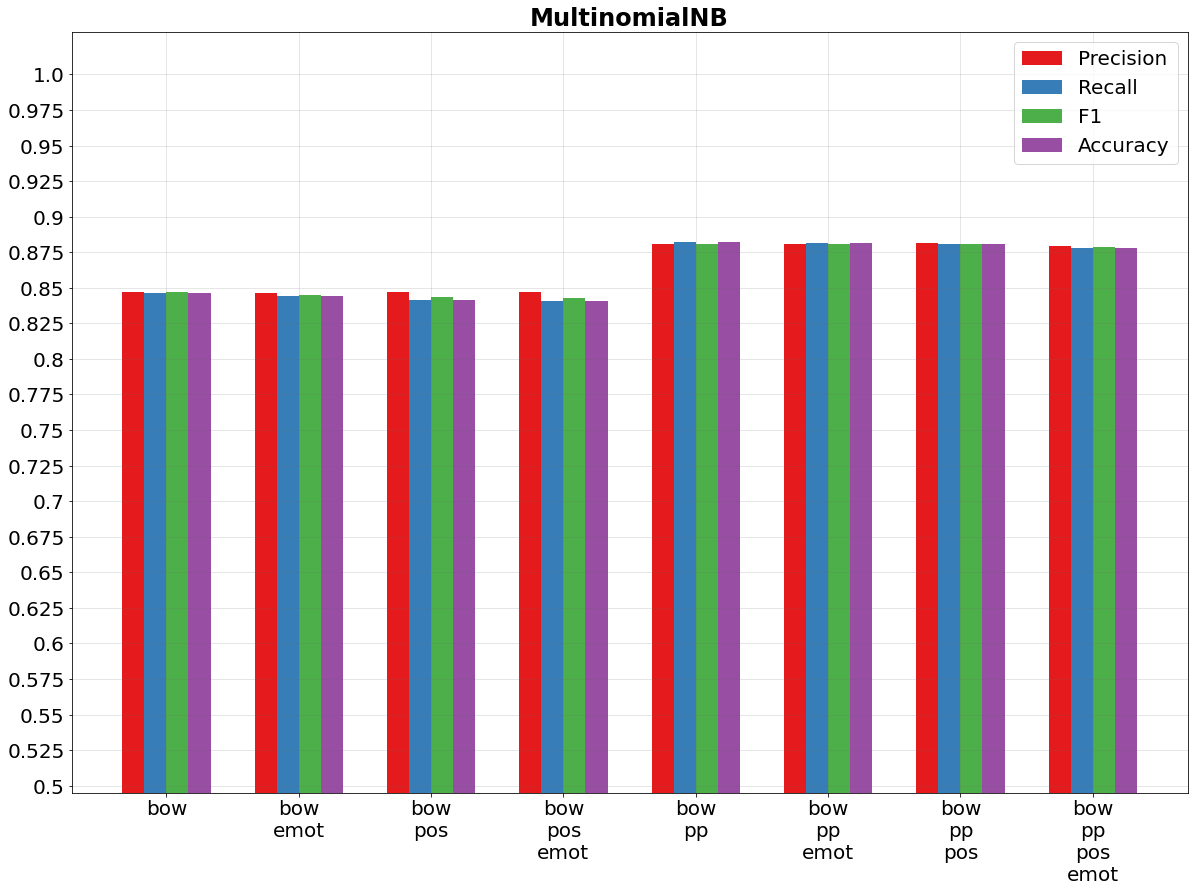

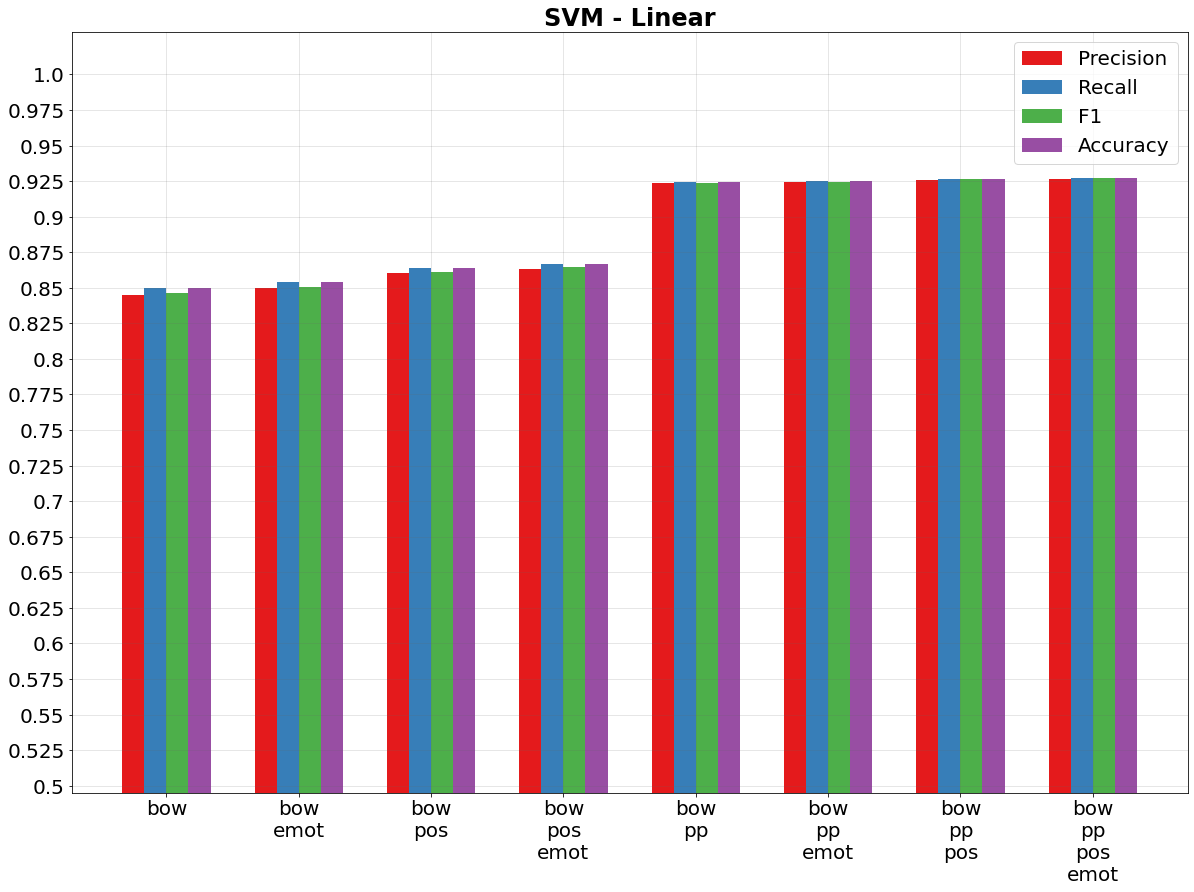

In [8]:
features_list = df_bow['features'].unique()
# Swap elements
features_list[3], features_list[4] = features_list[4], features_list[3]
# Plot each classifier
for classifier in df_bow['classifier'].unique():
	values = evaluate_features_data(df_bow, classifier)
	plot_features(values, classifier)

### Features senza BOW

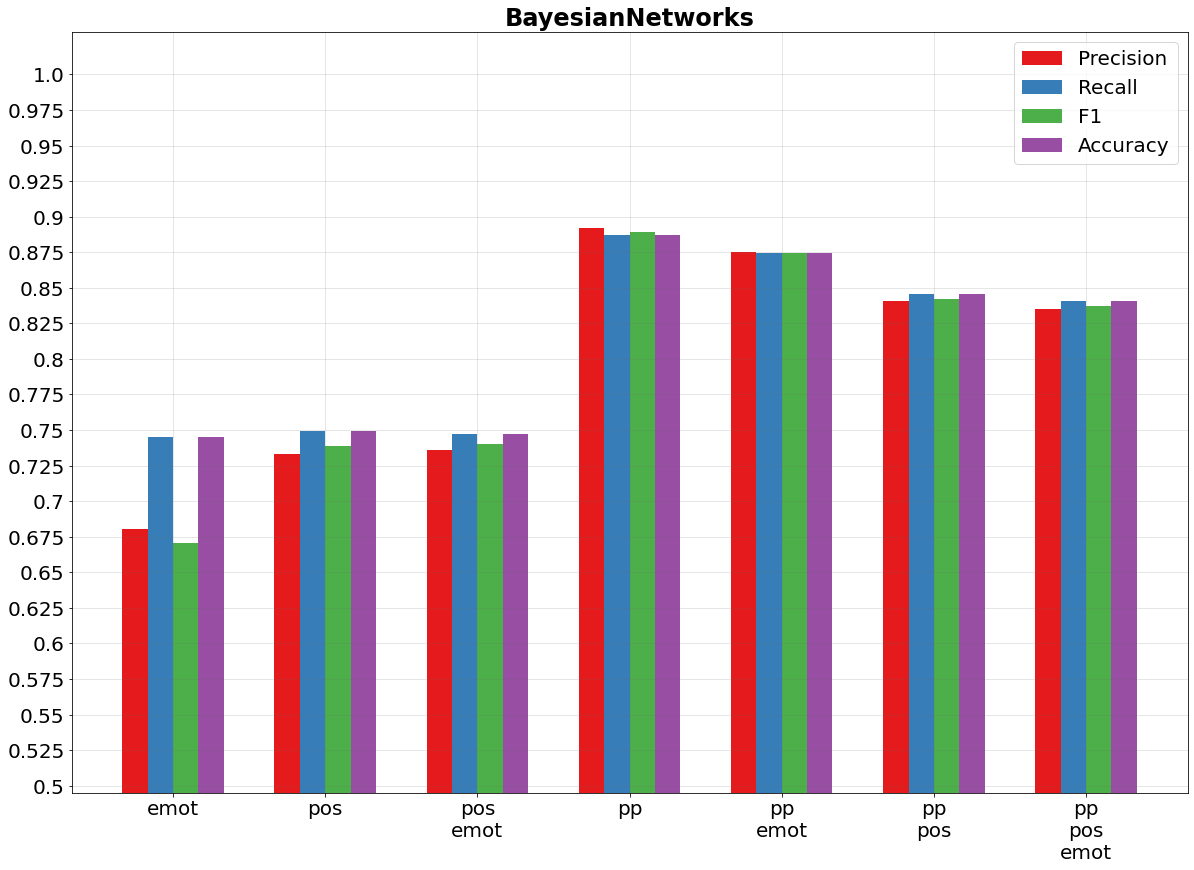

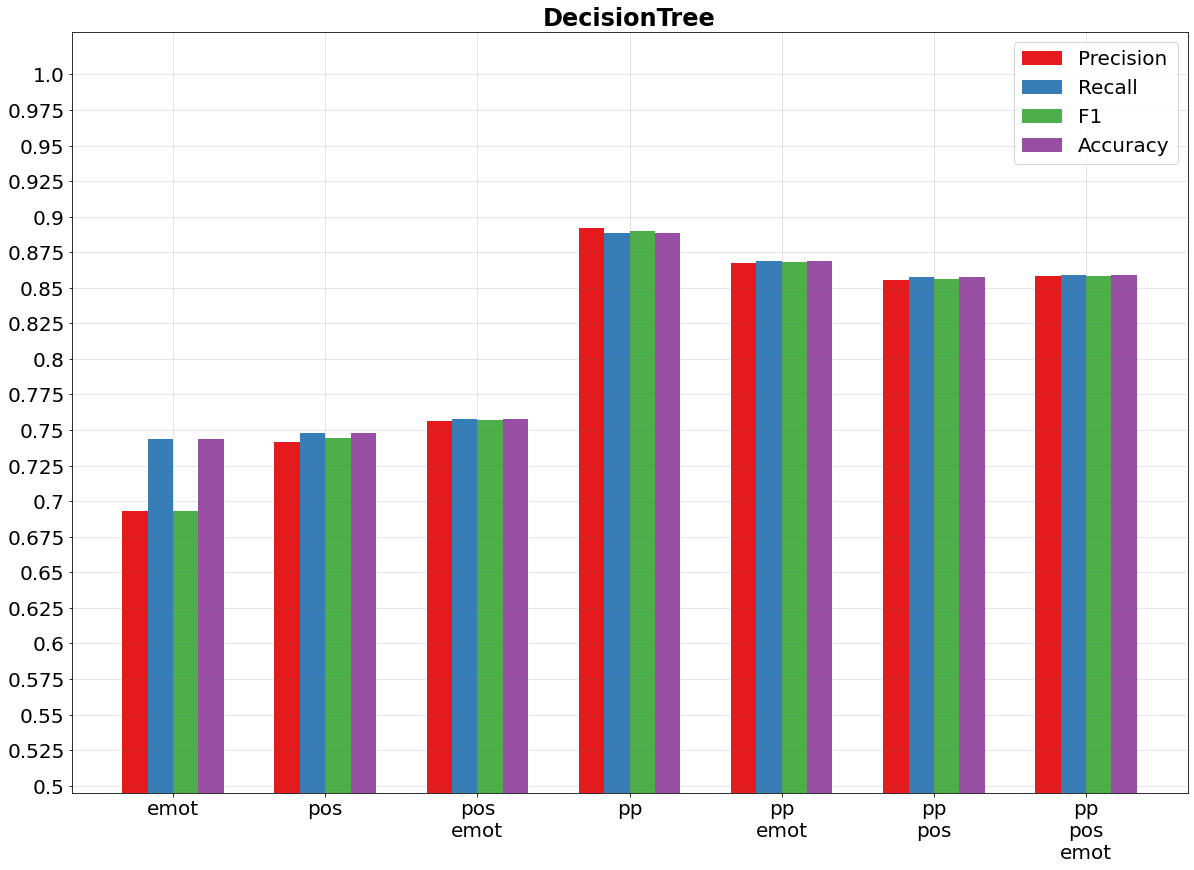

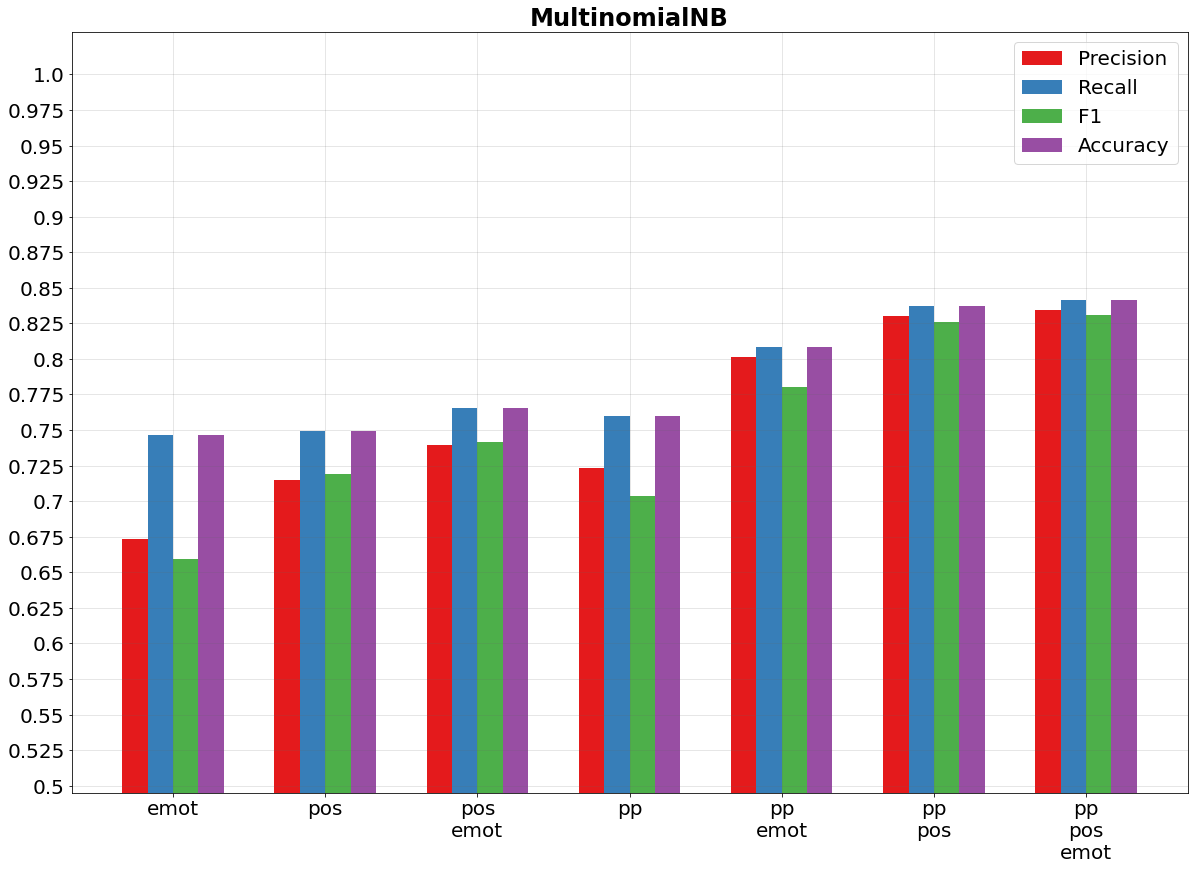

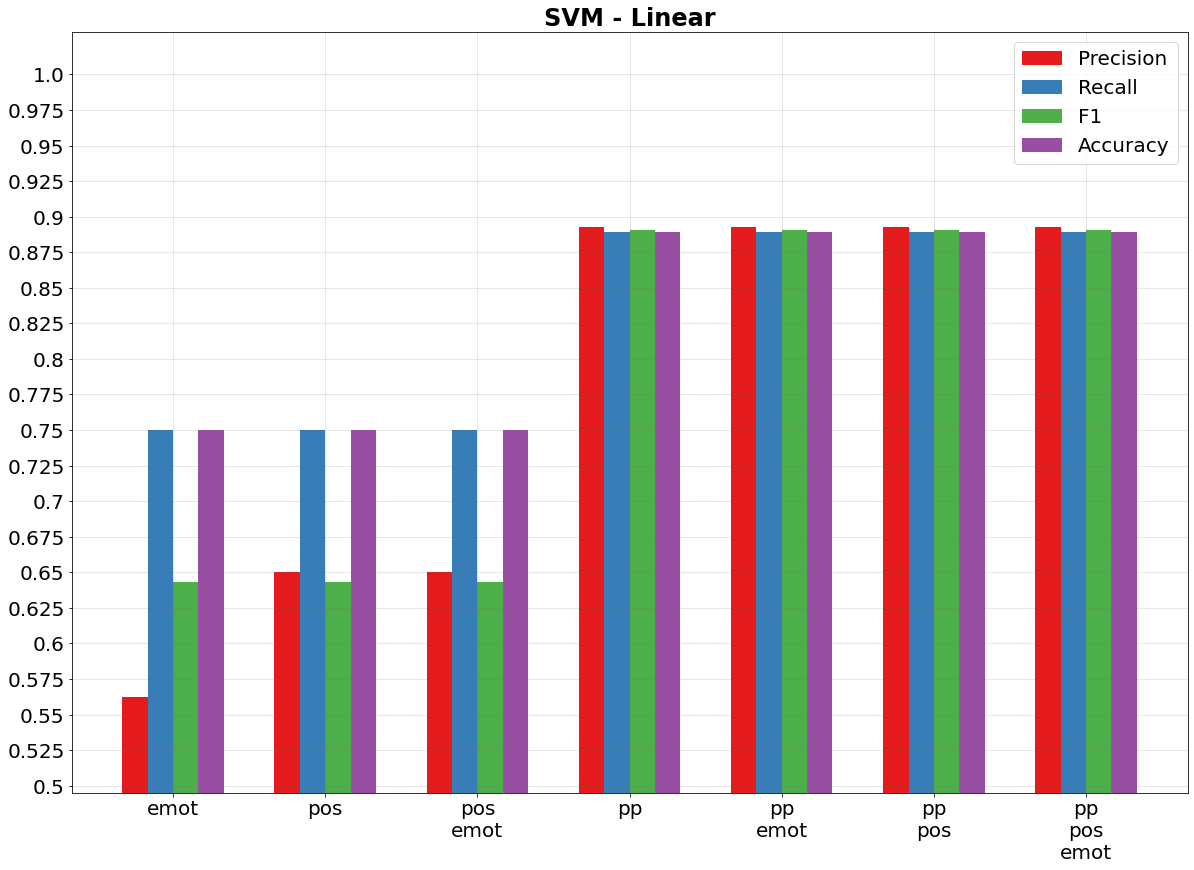

In [9]:
features_list = df_nobow['features'].unique()
# Swap elements
features_list[2], features_list[3] = features_list[3], features_list[2]
# Plot each classifier
for classifier in df_nobow['classifier'].unique():
	values = evaluate_features_data(df_nobow, classifier)
	plot_features(values, classifier)

## Ironic / Non ironic

In [10]:
reports_list = ['{}.precision', '{}.recall', '{}.f1-score']

def evaluate_emotions_data(df, classifier):
	reports = [r.format('False') for r in reports_list] + [r.format('True') for r in reports_list]
	plot_values = []
	for report in reports:
		values = []
		for feature in features_list:
			value = df[((df['features'] == feature) & (df['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_emotions(plot_values, classifier):
	# Figure
	title = '{}'.format(classifier, 'Non ' if type == 'False' else '')
	# Plot
	fig, ax = plt.subplots(figsize=(19, Y_SIZE + 4))
	bar_width = 0.4
	# Axis idx
	indx = np.arange(len(reports_list) * 2) * 4
	yndx = [round(x, 3) for x in np.arange(0, 1.025, 0.025)]
	# Data
	for i, (values, feature, color) in enumerate(zip(plot_values, features_list, colors)):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=feature)
	# X axis
	ax.set_xticks(indx + bar_width * 3)
	names = ['Precision{}','Recall{}', 'F1{}']
	x_labels = [feature.format('-') for feature in names] + [feature.format('+') for feature in names] 
	ax.set_xticklabels(x_labels)
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	plt.ylim(0, 1.30)
	# Legend
	ax.legend(loc='best')
	plt.title(title, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	# Show
	plt.show()

### Features con BOW

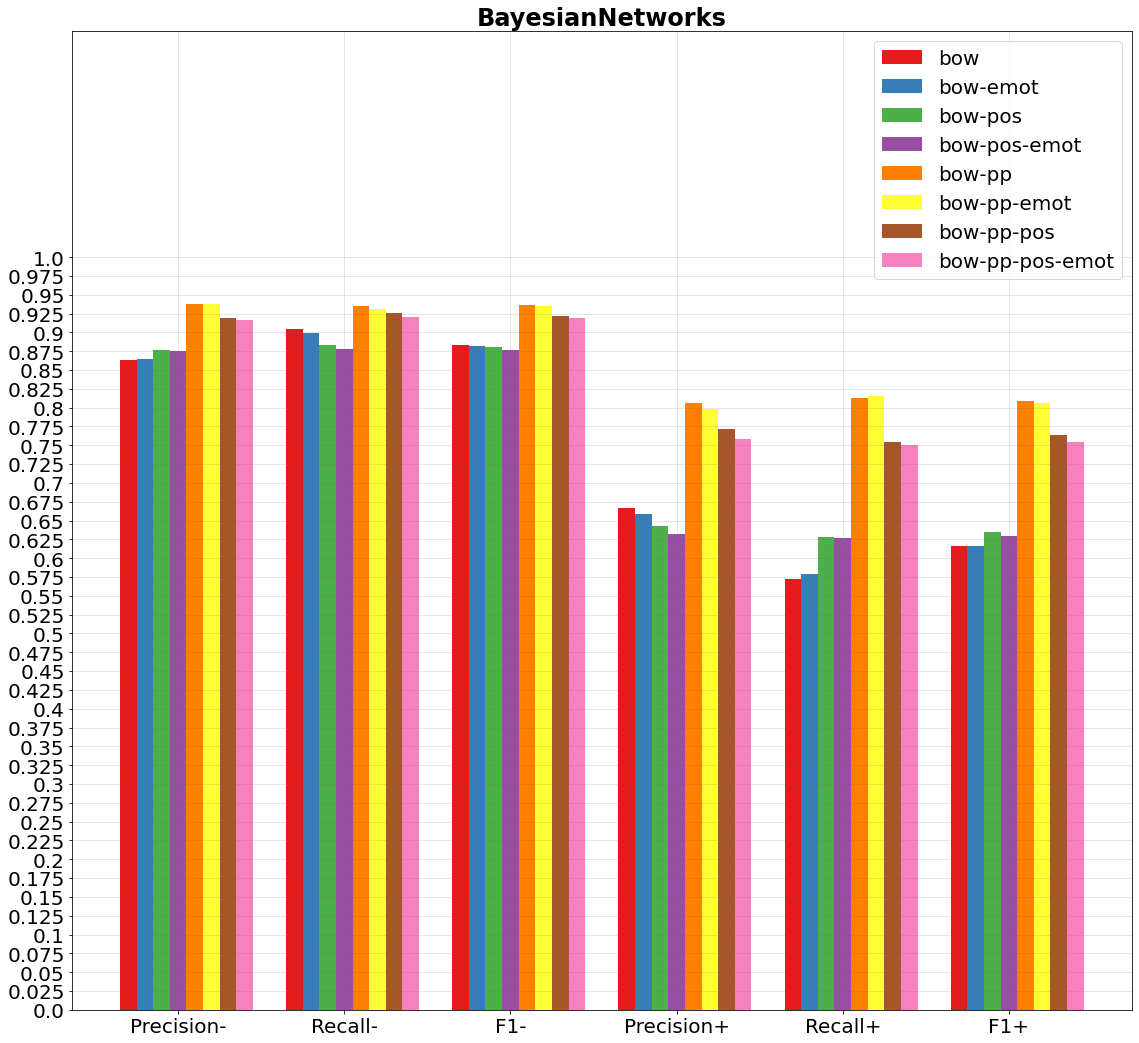

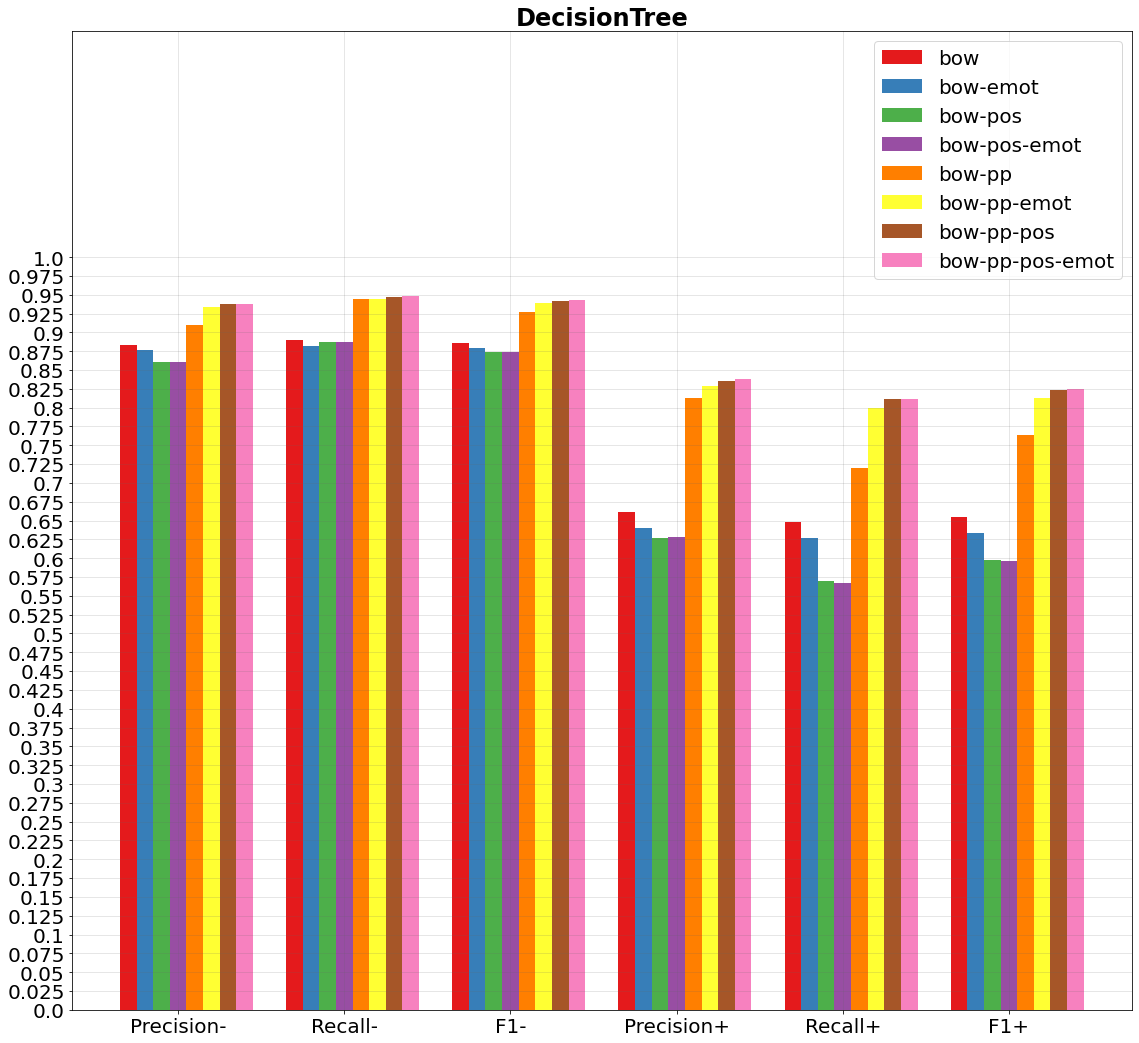

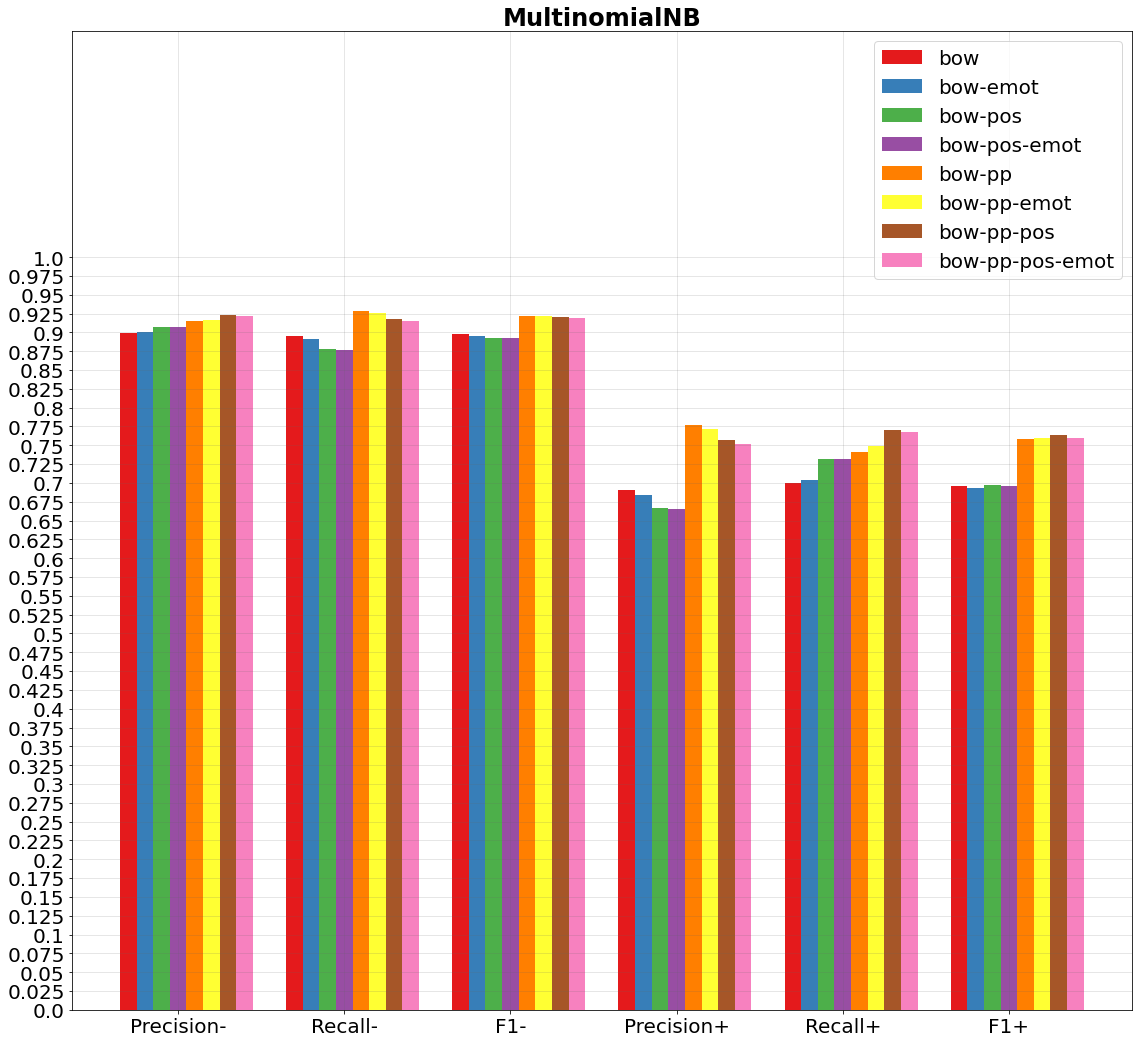

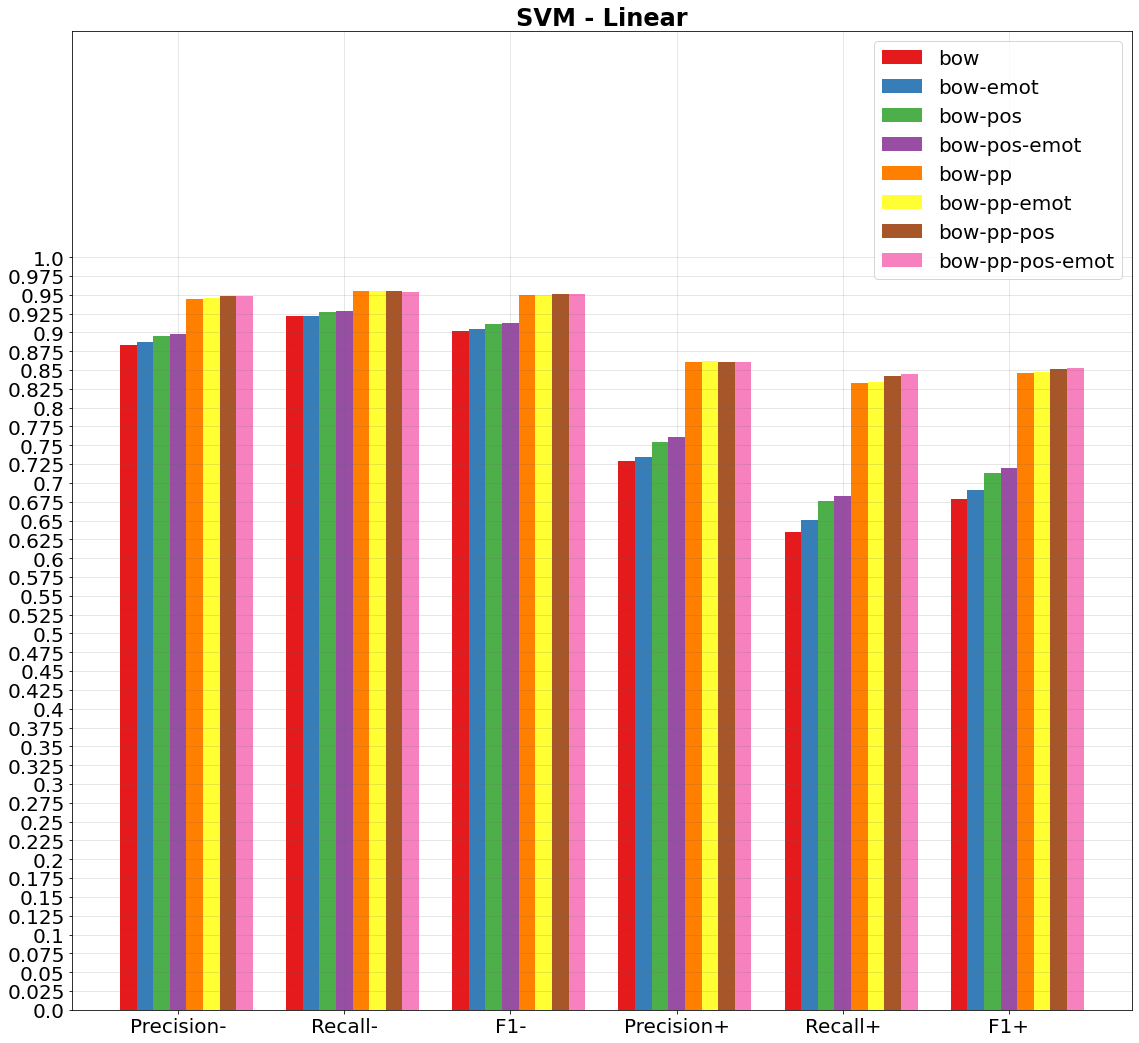

In [11]:
features_list = df_bow['features'].unique()
# Swap elements
features_list[3],features_list[4] = features_list[4], features_list[3] 
# Plot each classifier
for classifier in df_bow['classifier'].unique():
	emotions_data = evaluate_emotions_data(df_bow, classifier)
	plot_emotions(emotions_data, classifier)

### Features senza BOW

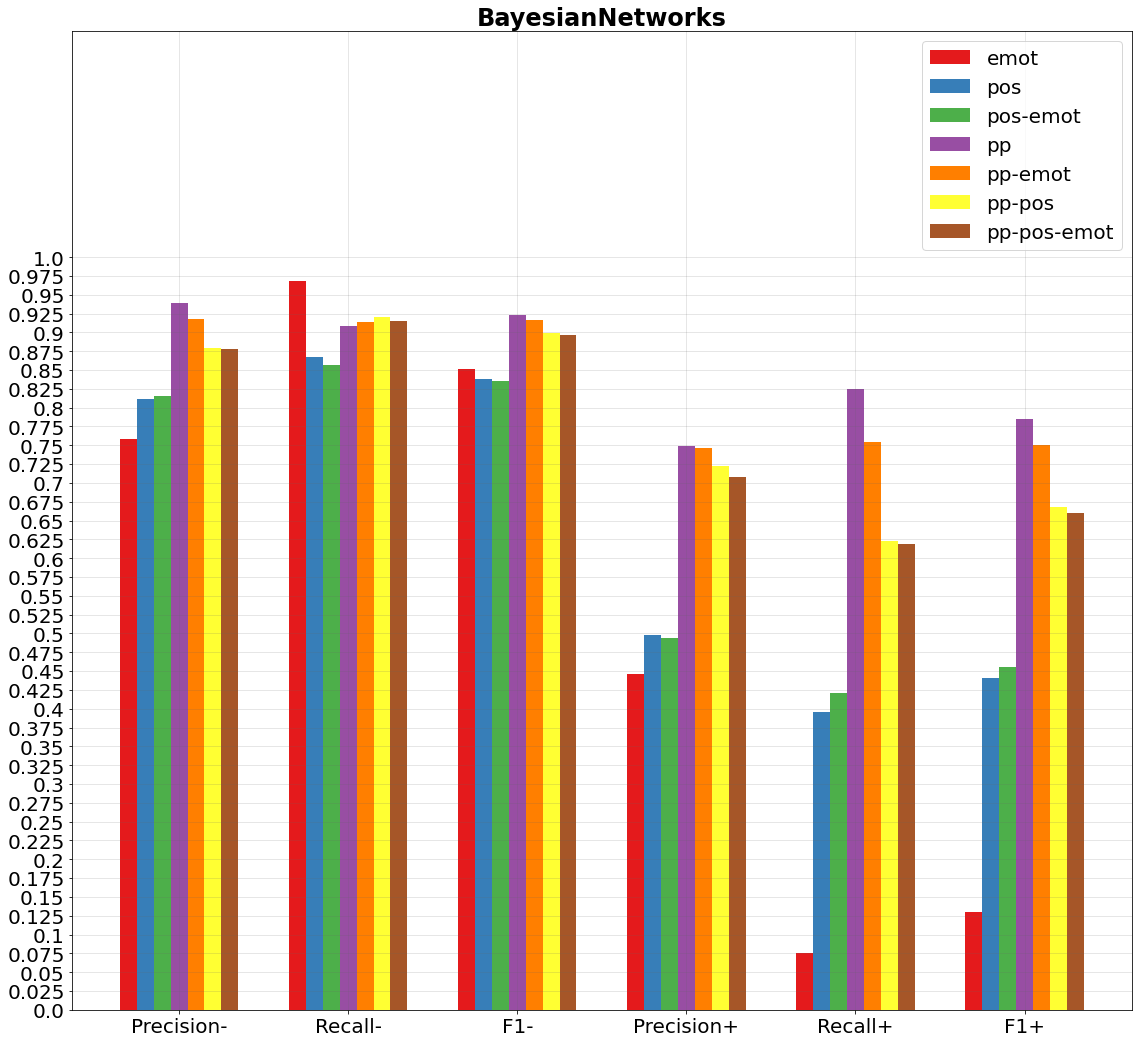

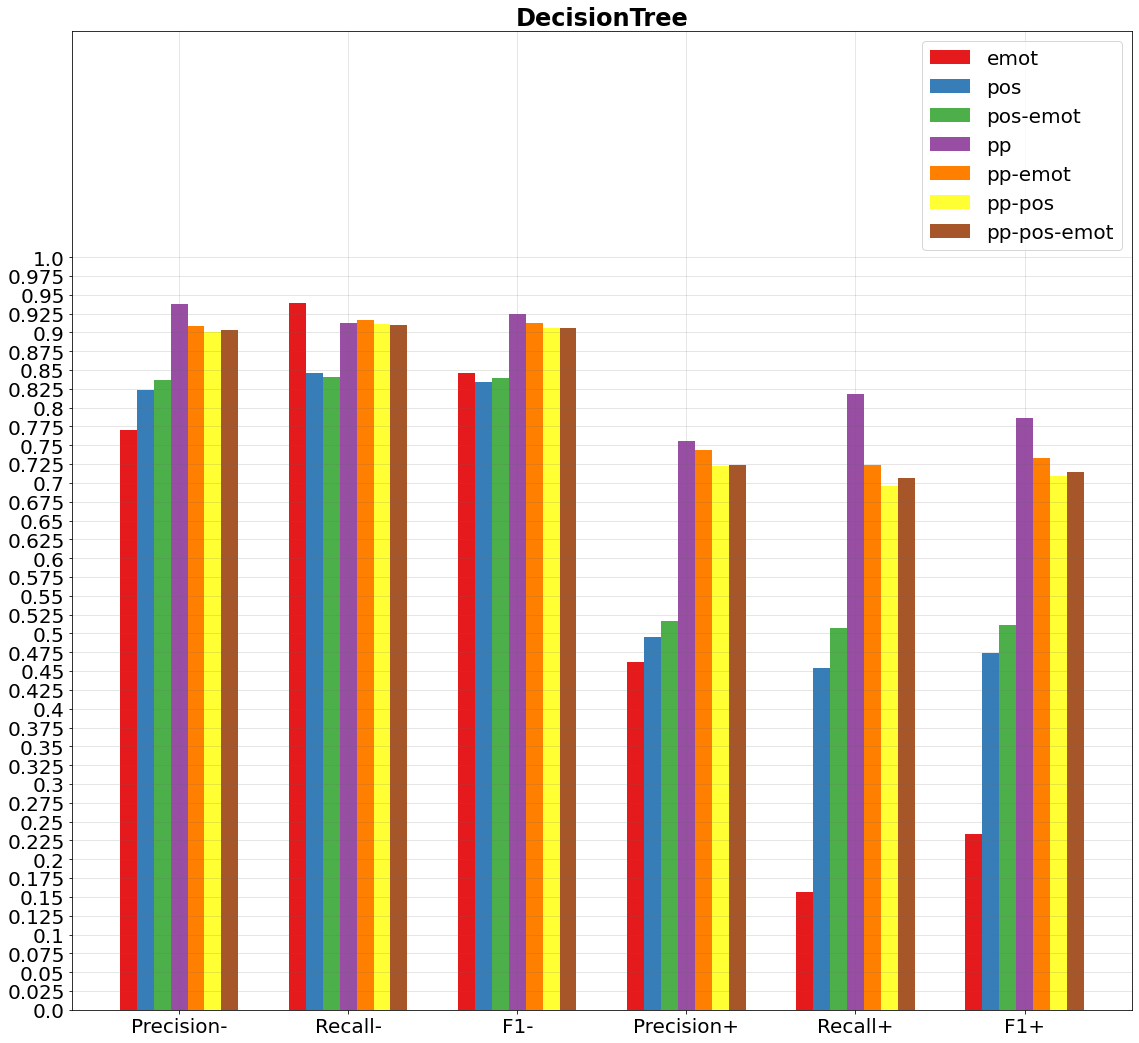

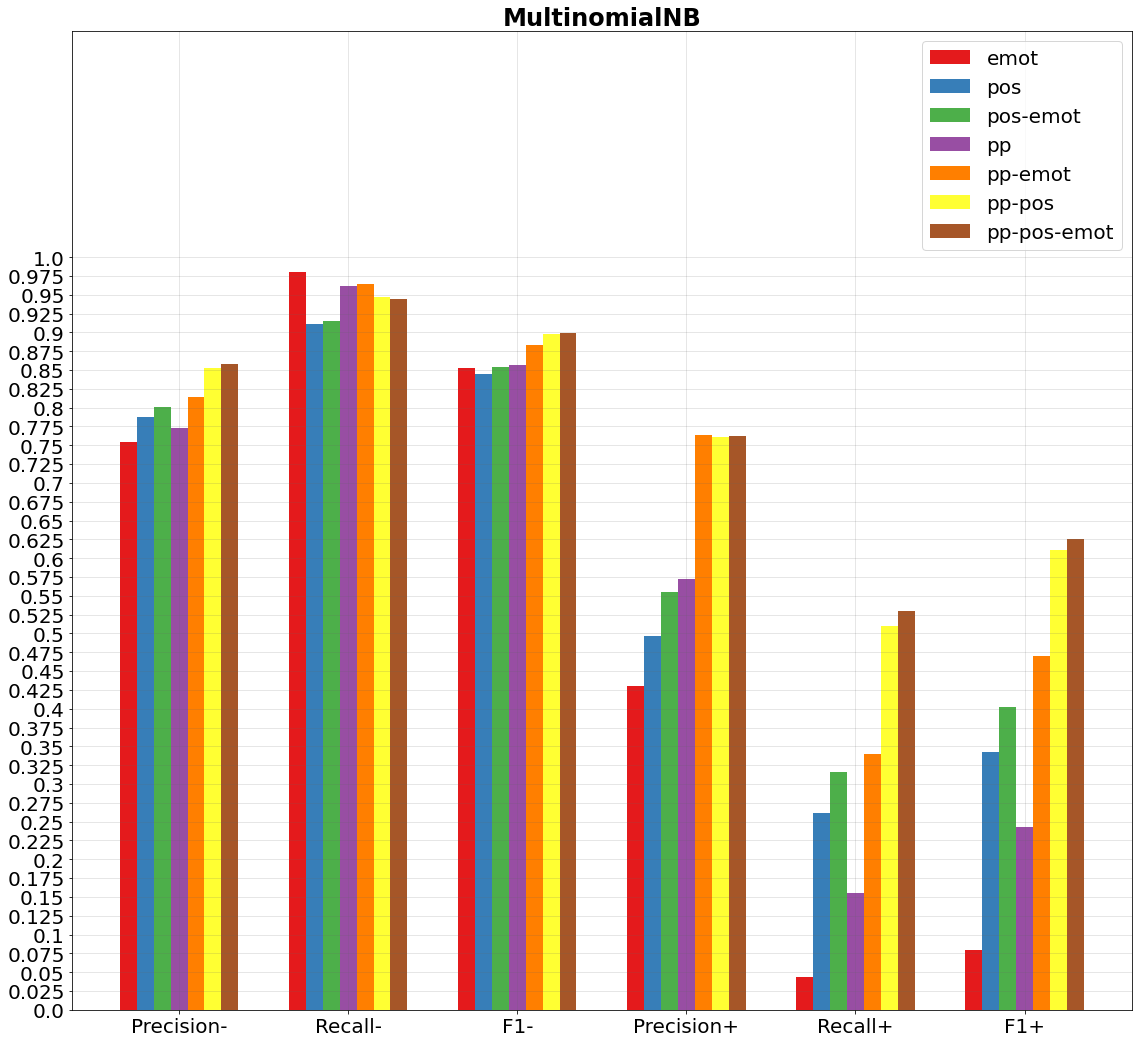

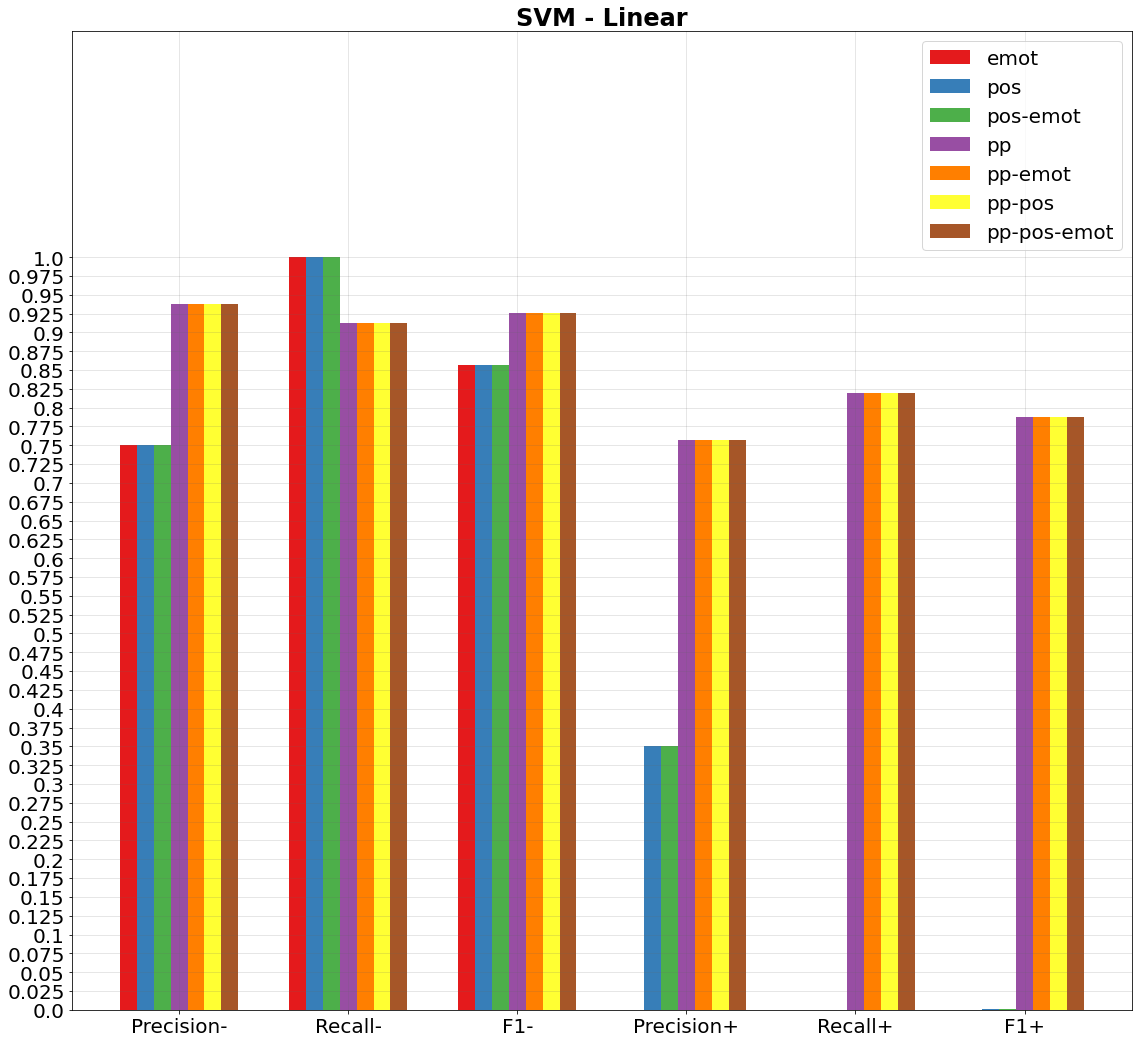

In [12]:
features_list = df_nobow['features'].unique()
# Swap elements
features_list[2],features_list[3] = features_list[3], features_list[2] 
# Plot each classifier
for classifier in df_nobow['classifier'].unique():
	emotions_data = evaluate_emotions_data(df_nobow, classifier)
	plot_emotions(emotions_data, classifier)

## Confusion matrix

In [13]:
import seaborn as sns

def confusion_matrix_data(df):
    confusion_matrix_list = []
    for feature in features_list:
        values = []
        for classifier in classifer_list:
            row = df[((df['features'] == feature) & (df['classifier'] == classifier))]
            matrix = np.array(row['confusion-matrix'].values[0])
            values.append(matrix.transpose())
        confusion_matrix_list.append(values)
    return confusion_matrix_list

def plot_confusion_matrix(cm, title='Confusion matrix'):
	target_names = ['Non Ironic', 'Ironic']
	sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, vmin=0, vmax=1,  square=True)
	plt.title(title)
	tick_marks = np.arange(len(target_names))
	plt.xticks(tick_marks + 0.5, target_names, rotation=45)
	plt.yticks(tick_marks + 0.5, target_names, va="center", rotation=45)
	
def plot_all_confusion_matrix(features_list, classifer_list, confusion_matrix_list):
	for i, feature in enumerate(features_list):
		plt.figure(figsize=(26, 5))
		for j, classifier in enumerate(classifer_list):	
			# Compute confusion 
			cm = confusion_matrix_list[i][j]
			cm_normalized = np.around(cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 10**-3), decimals=2)
			plt.subplot(1, len(classifer_list), j+1)
			plot_confusion_matrix(cm_normalized, title=classifier)
		#plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.0)
		plt.tight_layout(pad=0.2, w_pad=0.2)
		plt.suptitle(feature.upper(), fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'}, y=1.1, ha='center')
		plt.show()

### Usando feature testuali

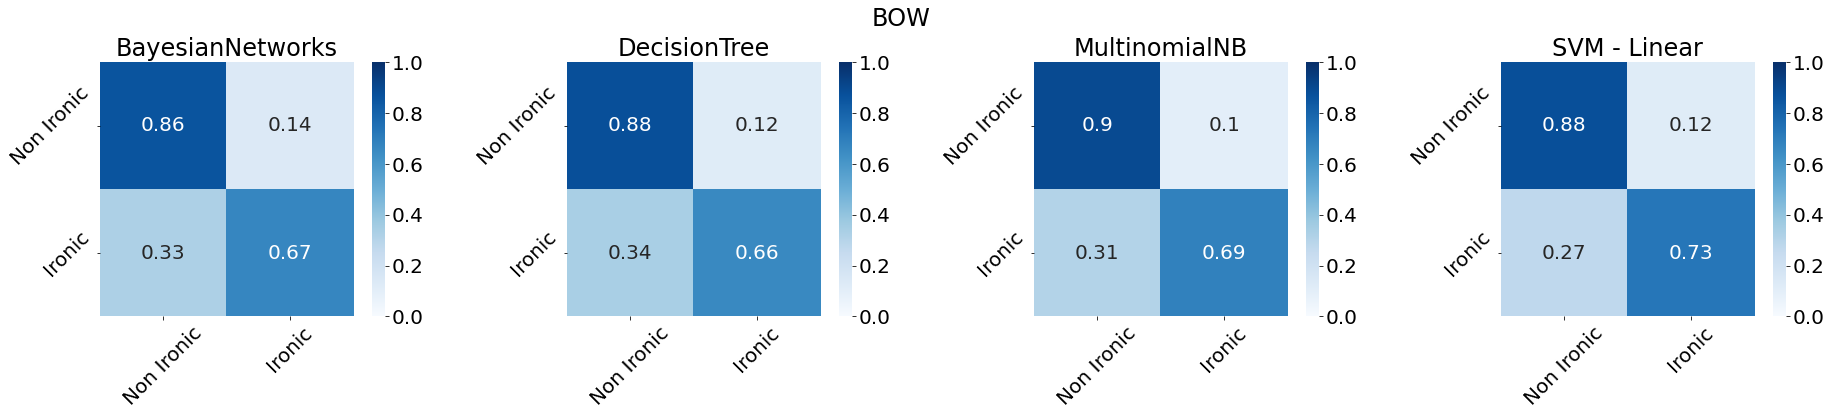

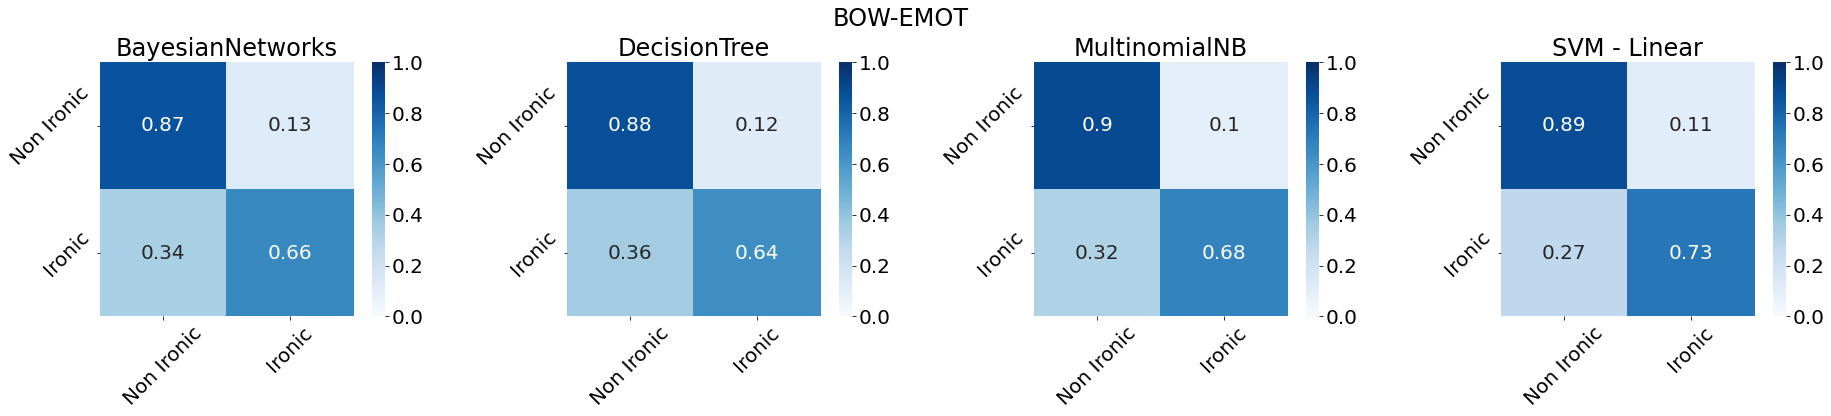

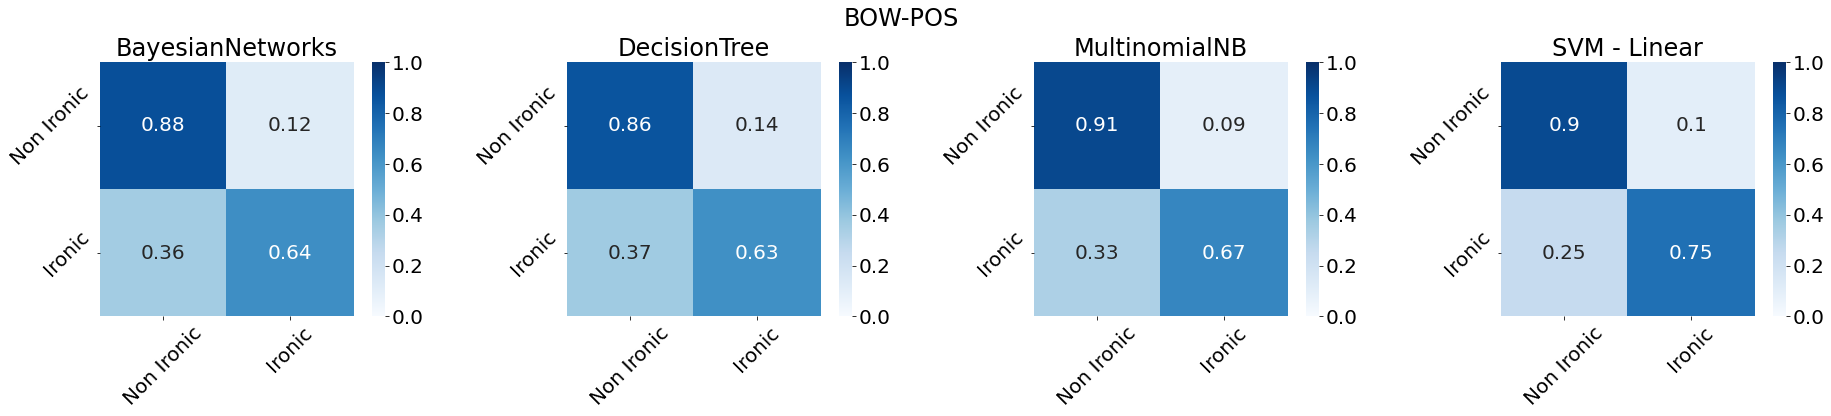

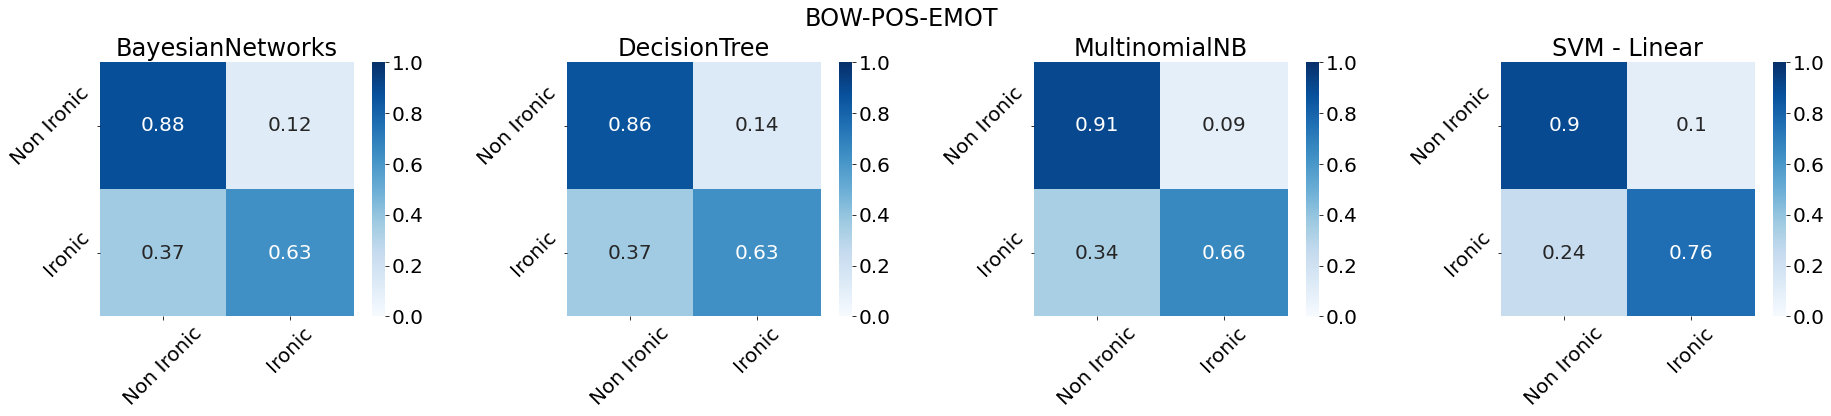

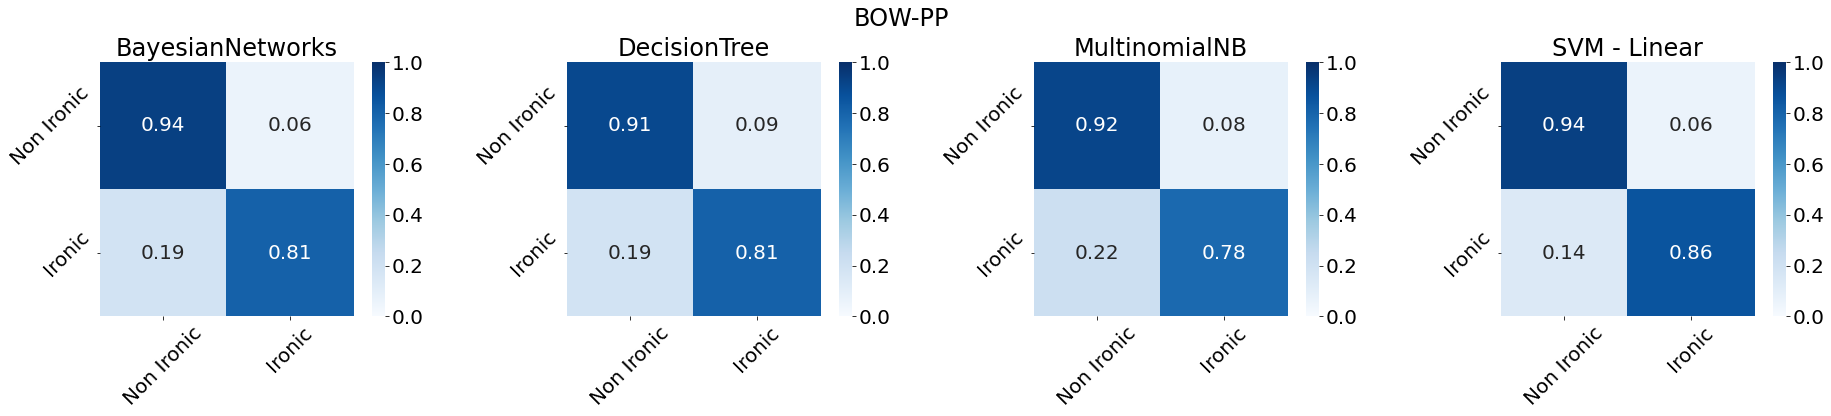

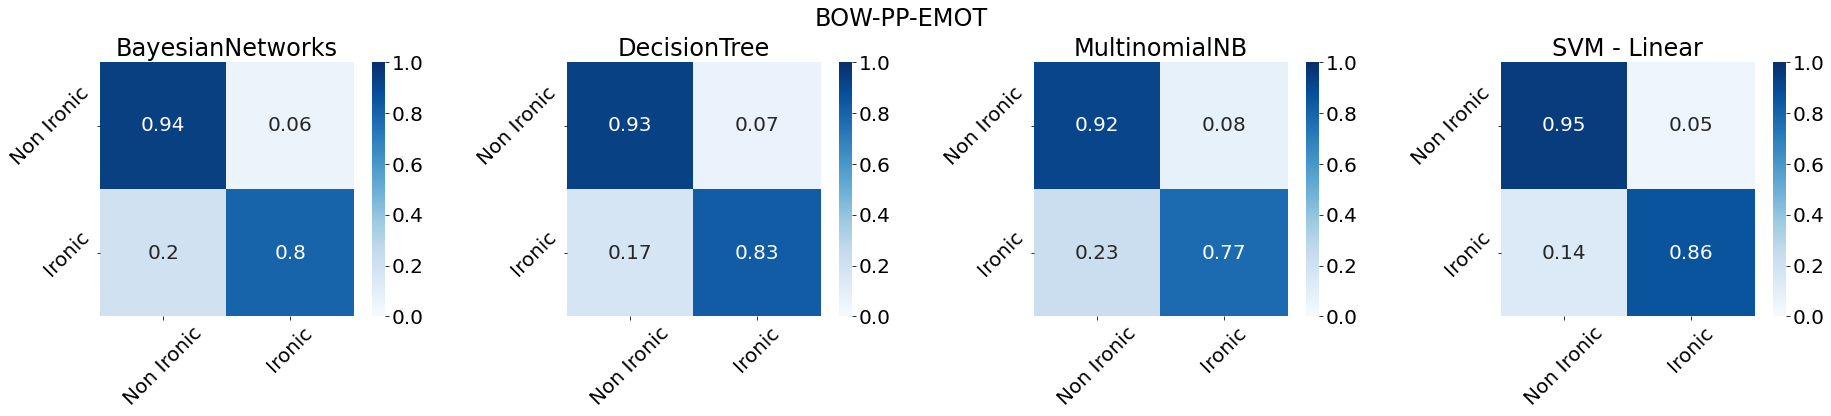

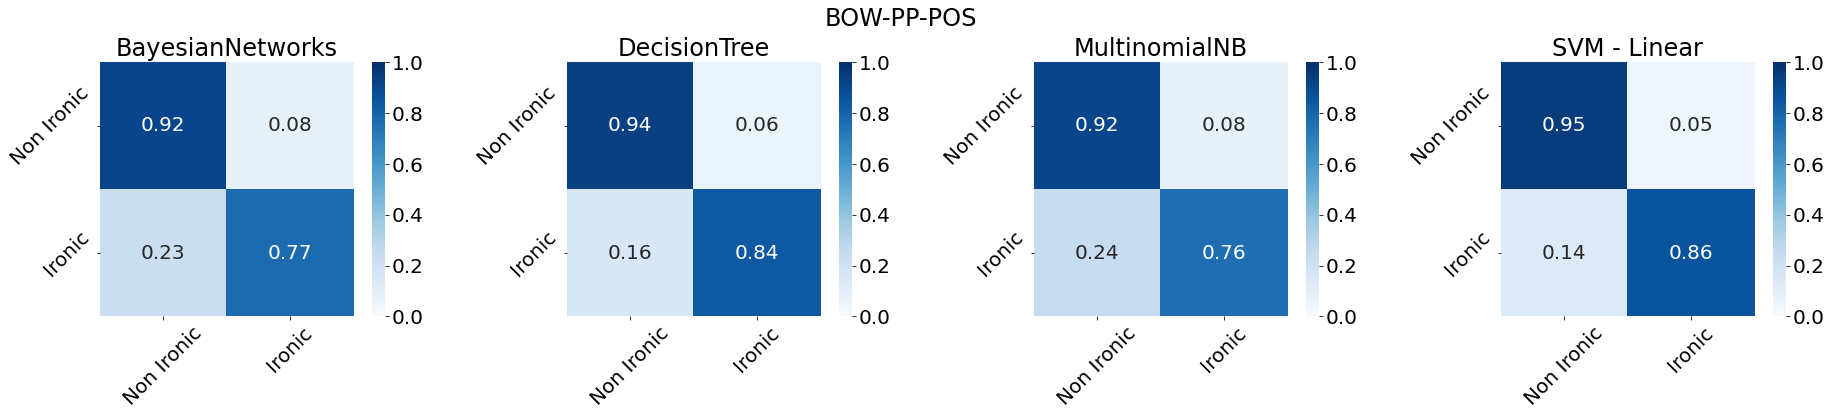

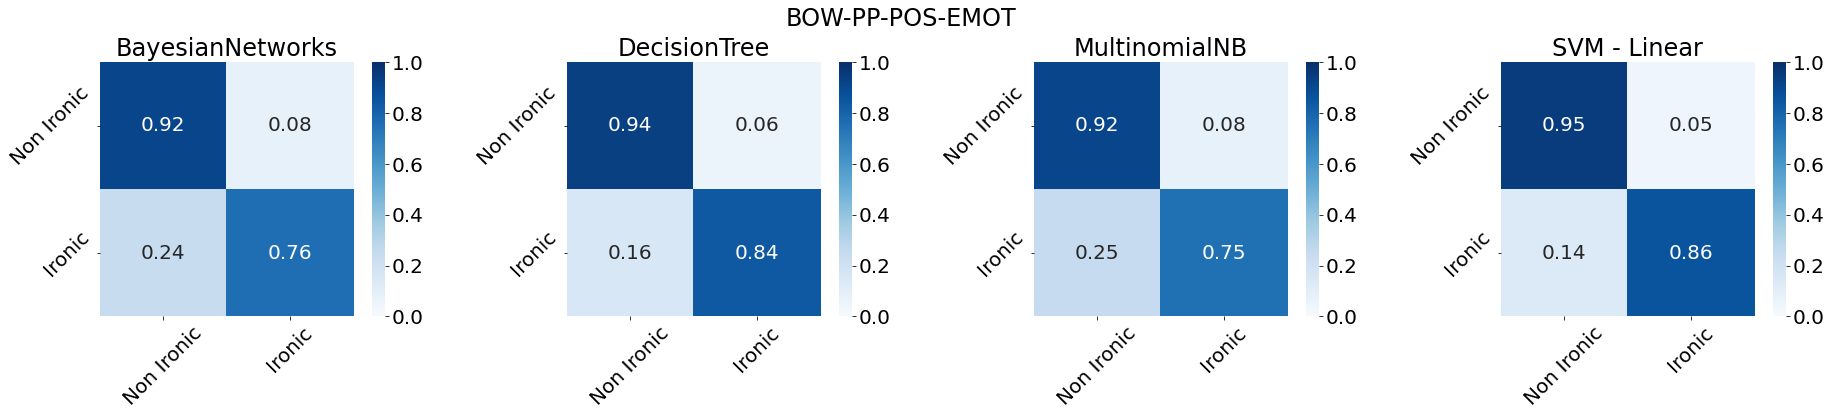

In [14]:
# Plot confusion matrix
classifer_list = df_bow['classifier'].unique()
# Features list
features_list = df_bow['features'].unique()
features_list[3], features_list[4] = features_list[4], features_list[3]
# Confusion matrix
confusion_matrix_list = confusion_matrix_data(df_bow)
plot_all_confusion_matrix(features_list, classifer_list, confusion_matrix_list)

### Senza usare feature testuali

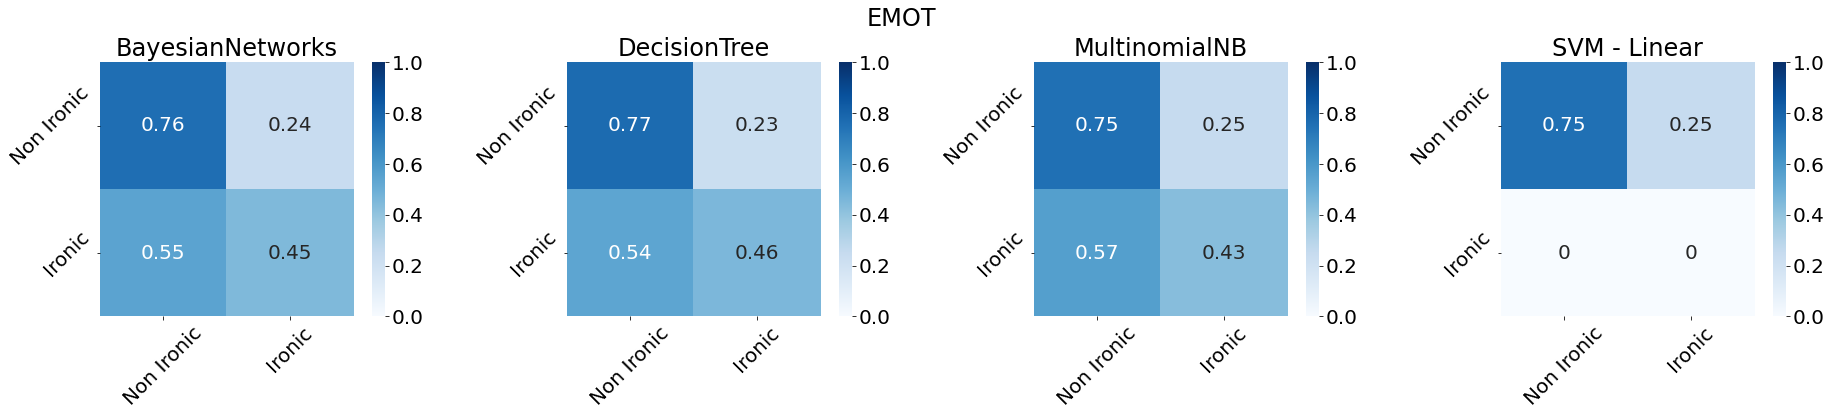

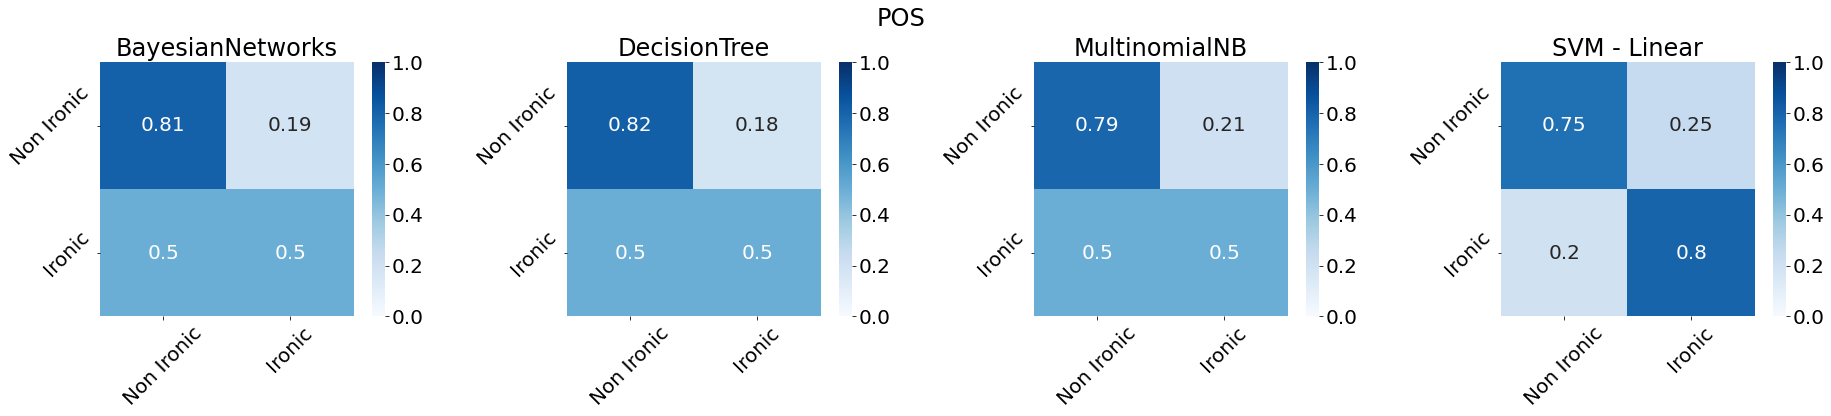

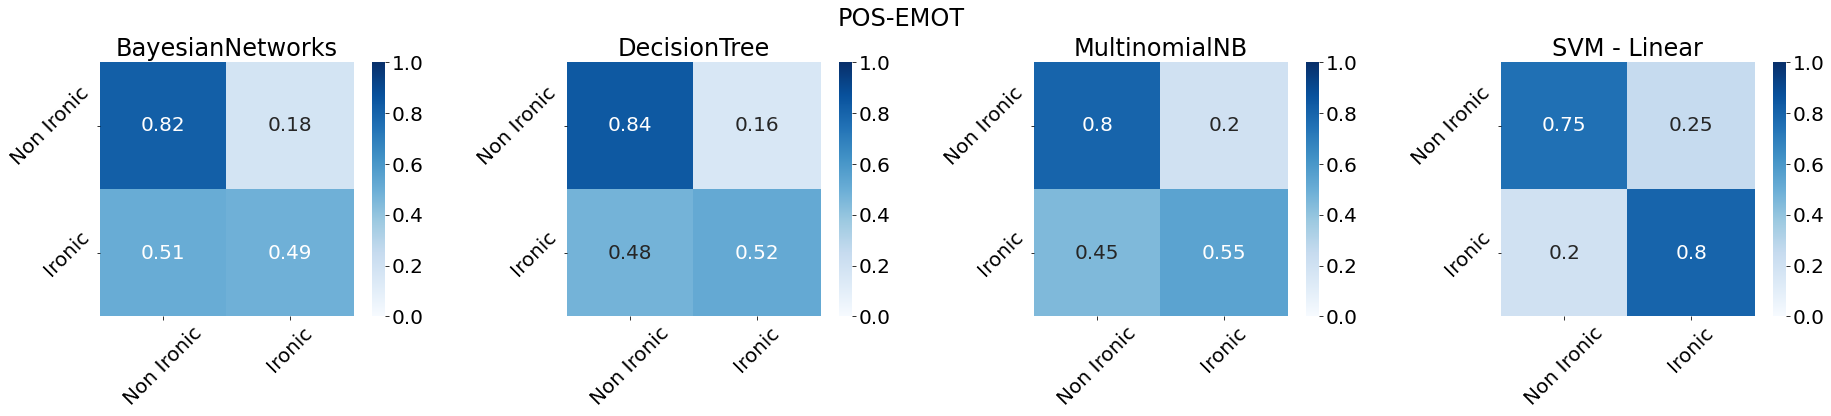

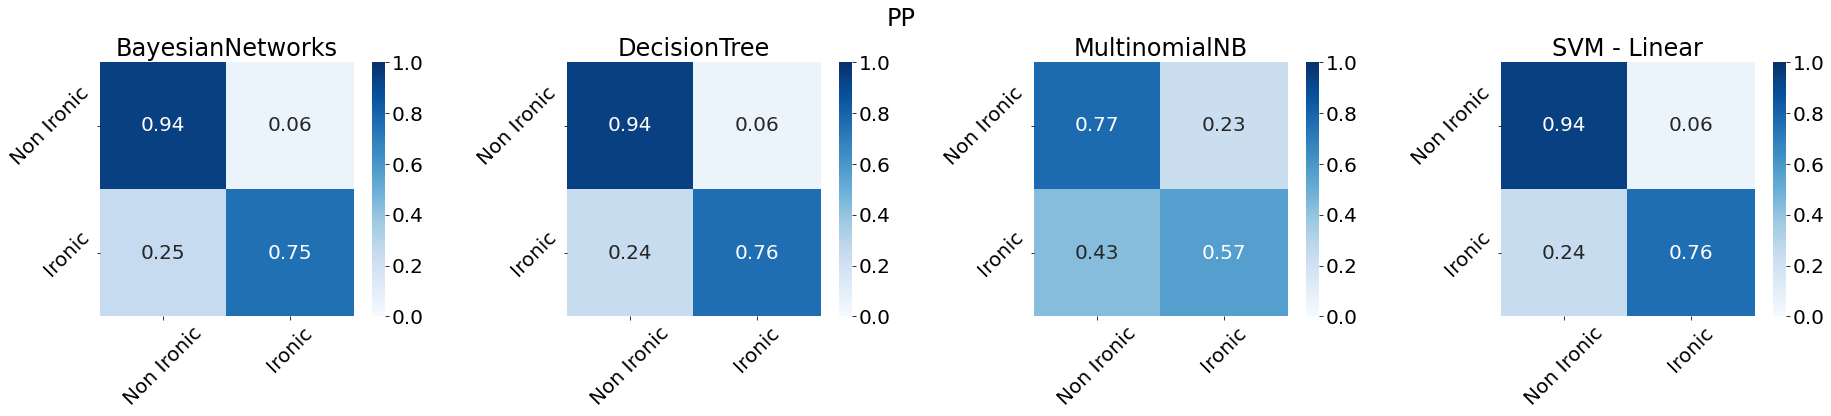

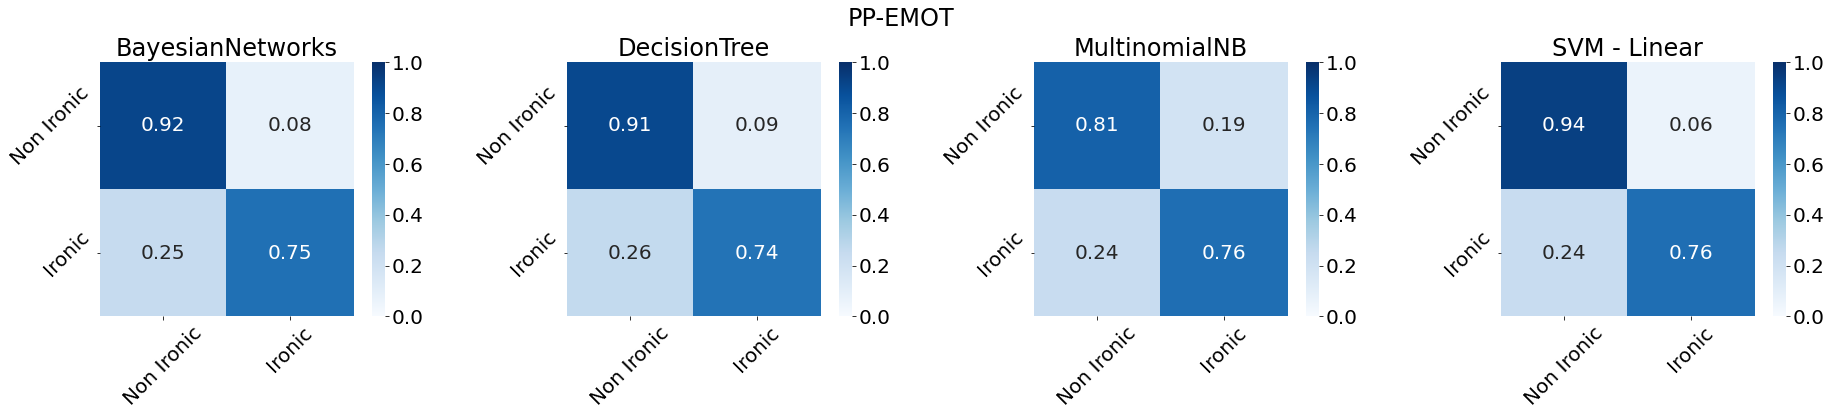

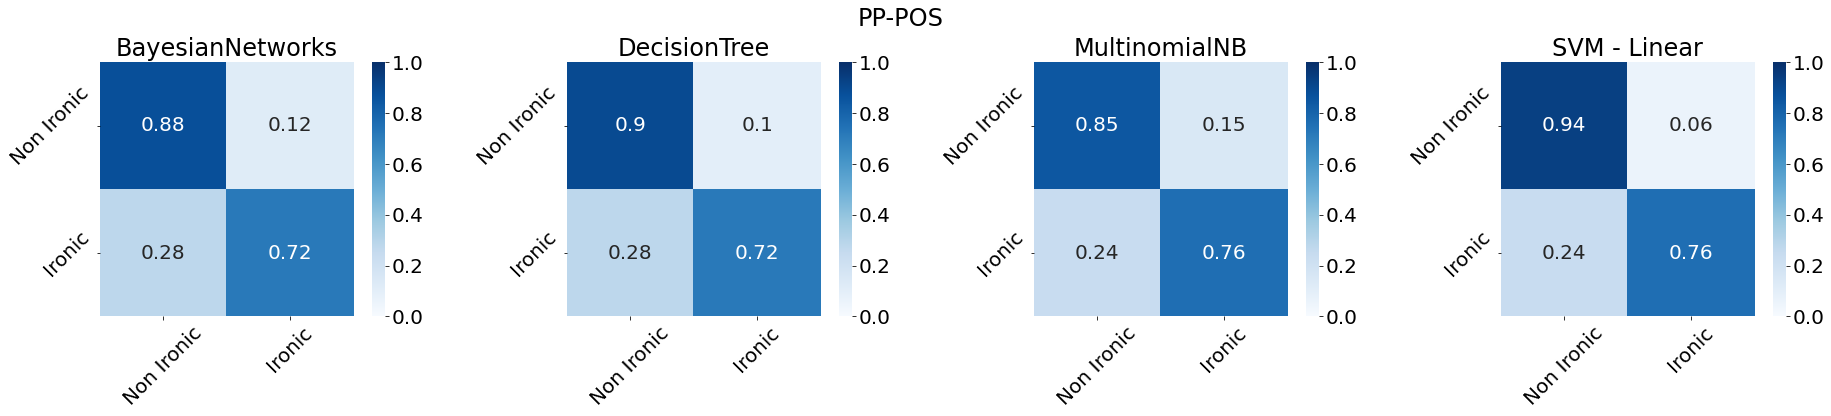

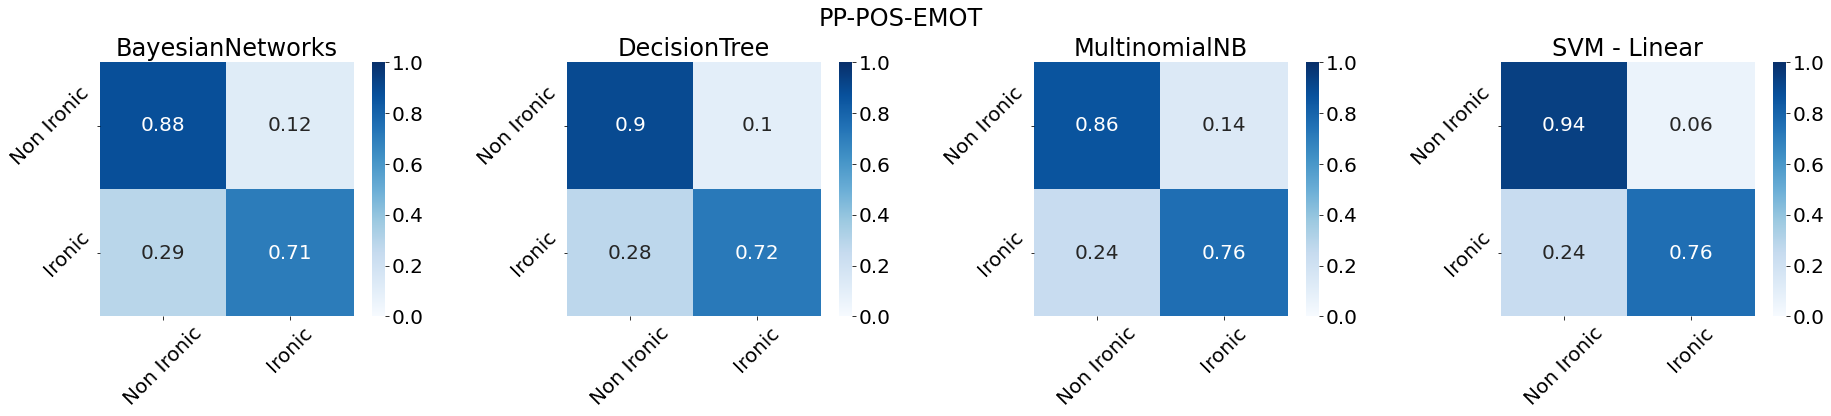

In [15]:
classifer_list = df_nobow['classifier'].unique()
# Features list
features_list = df_nobow['features'].unique()
features_list[2], features_list[3] = features_list[3], features_list[2]
# Confusion matrix
confusion_matrix_list = confusion_matrix_data(df_nobow)
plot_all_confusion_matrix(features_list, classifer_list, confusion_matrix_list)

## BERT: Sentence embeddings a partire da word embeddings 
Per creare le feature testuali con BERT considero ogni documento e creo un tensore:

`12 x #Tokens x 768` 

Considero quindi l'ultimo layer della rete neurale e faccio la media aggregando i tokens

La matrice risultante sarà di tipo float della forma:

`#Documenti x 768` 

### Lista dei file di report relativi alla feature testuale generata da BERT

In [16]:
# Read Bert report
report_file_list_bert = read_file_list('bert')
sorted(report_file_list_bert)

['bert$BayesianNetworks.json',
 'bert$DecisionTreeClassifier.json',
 'bert$SVC_linear.json',
 'bert$SVC_rbf.json',
 'bert-emot$BayesianNetworks.json',
 'bert-emot$DecisionTreeClassifier.json',
 'bert-emot$SVC_linear.json',
 'bert-emot$SVC_rbf.json',
 'bert-pos$BayesianNetworks.json',
 'bert-pos$DecisionTreeClassifier.json',
 'bert-pos$SVC_linear.json',
 'bert-pos$SVC_rbf.json',
 'bert-pos-emot$BayesianNetworks.json',
 'bert-pos-emot$DecisionTreeClassifier.json',
 'bert-pos-emot$SVC_linear.json',
 'bert-pos-emot$SVC_rbf.json',
 'bert-pp$BayesianNetworks.json',
 'bert-pp$DecisionTreeClassifier.json',
 'bert-pp$SVC_linear.json',
 'bert-pp$SVC_rbf.json',
 'bert-pp-emot$BayesianNetworks.json',
 'bert-pp-emot$DecisionTreeClassifier.json',
 'bert-pp-emot$SVC_linear.json',
 'bert-pp-emot$SVC_rbf.json',
 'bert-pp-pos$BayesianNetworks.json',
 'bert-pp-pos$DecisionTreeClassifier.json',
 'bert-pp-pos$SVC_linear.json',
 'bert-pp-pos$SVC_rbf.json',
 'bert-pp-pos-emot$BayesianNetworks.json',
 'bert-p

### Dataframe BERT

In [17]:
report_bert = read_report_file(report_file_list_bert)
df_bert = json_normalize(report_bert)
df_bert.head()

,classifier,features,confusion-matrix,accuracy,False.precision,False.recall,False.f1-score,False.support,True.precision,True.recall,True.f1-score,True.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support
0,BayesianNetworks,bert,"[[2277.3, 722.7], [174.2, 825.8]]",0.775775,0.928962,0.759100,0.835462,3000.0,0.533367,0.825800,0.648081,1000.0,0.830063,0.775775,0.788617,4000.0,NaN,NaN,NaN,NaN
1,DecisionTree,bert,"[[25712.0, 4288.0], [4270.0, 5730.0]]",0.786050,0.857581,0.857067,0.857307,30000.0,0.572178,0.573012,0.572493,10000.0,0.786256,0.786050,0.786115,40000.0,0.714879,0.715040,0.714900,40000.0
2,SVM - Linear,bert,"[[28185.0, 1815.0], [2619.0, 7381.0]]",0.889150,0.914976,0.939494,0.927069,30000.0,0.802725,0.738100,0.769019,10000.0,0.886919,0.889150,0.887561,40000.0,0.858851,0.838797,0.848044,40000.0
3,BayesianNetworks,bert-emot,"[[2277.5, 722.5], [174.3, 825.7]]",0.775800,0.928930,0.759167,0.835488,3000.0,0.533415,0.825700,0.648083,1000.0,0.830051,0.775800,0.788636,4000.0,NaN,NaN,NaN,NaN
4,DecisionTree,bert-emot,"[[25688.0, 4312.0], [4278.0, 5722.0]]",0.785250,0.857264,0.856274,0.856746,30000.0,0.570360,0.572223,0.571149,10000.0,0.785572,0.785250,0.785358,40000.0,0.713812,0.714249,0.713948,40000.0


## Sentence-BERT: Sentence Embeddings utilizzando Siamese BERT-Networks
- Paper: `Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks` (https://arxiv.org/abs/1908.10084)
- Repository: https://github.com/UKPLab/sentence-transformers

### Lista dei file di report relativi alla feature testuale generata da Sentence-BERT

In [18]:
# Read Sentence-BERT report
report_file_list_sbert = read_file_list('sbert')
sorted(report_file_list_sbert)

['sbert$BayesianNetworks.json',
 'sbert$DecisionTreeClassifier.json',
 'sbert$SVC_linear.json',
 'sbert$SVC_rbf.json',
 'sbert-emot$BayesianNetworks.json',
 'sbert-emot$DecisionTreeClassifier.json',
 'sbert-emot$SVC_linear.json',
 'sbert-emot$SVC_rbf.json',
 'sbert-pos$BayesianNetworks.json',
 'sbert-pos$DecisionTreeClassifier.json',
 'sbert-pos$SVC_linear.json',
 'sbert-pos$SVC_rbf.json',
 'sbert-pos-emot$BayesianNetworks.json',
 'sbert-pos-emot$DecisionTreeClassifier.json',
 'sbert-pos-emot$SVC_linear.json',
 'sbert-pos-emot$SVC_rbf.json',
 'sbert-pp$BayesianNetworks.json',
 'sbert-pp$DecisionTreeClassifier.json',
 'sbert-pp$SVC_linear.json',
 'sbert-pp$SVC_rbf.json',
 'sbert-pp-emot$BayesianNetworks.json',
 'sbert-pp-emot$DecisionTreeClassifier.json',
 'sbert-pp-emot$SVC_linear.json',
 'sbert-pp-emot$SVC_rbf.json',
 'sbert-pp-pos$BayesianNetworks.json',
 'sbert-pp-pos$DecisionTreeClassifier.json',
 'sbert-pp-pos$SVC_linear.json',
 'sbert-pp-pos$SVC_rbf.json',
 'sbert-pp-pos-emot$Bay

### Dataframe Sentence-BERT

In [19]:
report_sbert = read_report_file(report_file_list_sbert)
df_sbert = json_normalize(report_sbert)
df_sbert.head()

,classifier,features,confusion-matrix,accuracy,False.precision,False.recall,False.f1-score,False.support,True.precision,True.recall,True.f1-score,True.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support
0,BayesianNetworks,sbert,"[[2357.1, 642.9], [229.8, 770.2]]",0.781825,0.911202,0.785700,0.843791,3000.0,0.545069,0.770200,0.638319,1000.0,0.819669,0.781825,0.792423,4000.0,NaN,NaN,NaN,NaN
1,DecisionTree,sbert,"[[25751.0, 4249.0], [4418.0, 5582.0]]",0.783325,0.853569,0.858362,0.855950,30000.0,0.567759,0.558253,0.562912,10000.0,0.782134,0.783325,0.782694,40000.0,0.710664,0.708308,0.709431,40000.0
2,SVM - Linear,sbert,"[[28325.0, 1675.0], [2268.0, 7732.0]]",0.901425,0.925876,0.944156,0.934916,30000.0,0.822193,0.773140,0.796812,10000.0,0.899949,0.901425,0.900398,40000.0,0.874034,0.858648,0.865864,40000.0
3,BayesianNetworks,sbert-emot,"[[2354.4, 645.6], [229.7, 770.3]]",0.781175,0.911142,0.784800,0.843247,3000.0,0.544058,0.770300,0.637664,1000.0,0.819371,0.781175,0.791851,4000.0,NaN,NaN,NaN,NaN
4,DecisionTree,sbert-emot,"[[25718.0, 4282.0], [4396.0, 5604.0]]",0.783050,0.854034,0.857264,0.855640,30000.0,0.566736,0.560364,0.563496,10000.0,0.782233,0.783050,0.782621,40000.0,0.710385,0.708814,0.709568,40000.0


## BOW vs BERT vs Sentence-BERT
#### Weighted average
- Accuracy - {bow, bert, sbert}
- F1 score - {bow, bert, sbert}

In [20]:
# Read Bert report
features_list = [(lambda x : '-'.join(['{}'] + x[1:]))(feature.split('-'))
				 for feature in df_bert['features'].unique()]
features_list[3], features_list[4] = features_list[4], features_list[3]
reports_list = ['weighted avg.f1-score', 'accuracy']

def evaluate_bow_vs_bert(classifier, report):
    plot_values = []
    for feature in features_list:
        values = []
        for df, text_feature in zip([df_bow, df_bert, df_sbert], ['bow', 'bert', 'sbert']):
            value = df[((df['features'] == feature.format(text_feature)) &
                        (df['classifier'] == classifier))][report]
            values.append(float(value))
        plot_values.append(values)
    plot_values = np.transpose(np.array(plot_values))
    return plot_values

def plot_bow_vs_bert(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, Y_SIZE))
	bar_width = 0.75
	indx = np.arange(len(features_list)) * 4
	yndx = [round(x, 3) for x in np.arange(0, 1.05, 0.025)]
	# Data
	target_text_list = ['bow', 'bert', 'sbert']
	zip_data = zip(plot_values, target_text_list, colors)
	for i, (values, text_feature, color) in enumerate(zip_data):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=text_feature)
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.format('{text}').split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	min_value = 0.775
	plt.ylim(min_value - min_value * 0.05, 1.02)
	# Legend
	ax.legend(loc='best')
	# Show
	plt.title(classifier_name, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	plt.show()

### Accuracy
Weighted Average

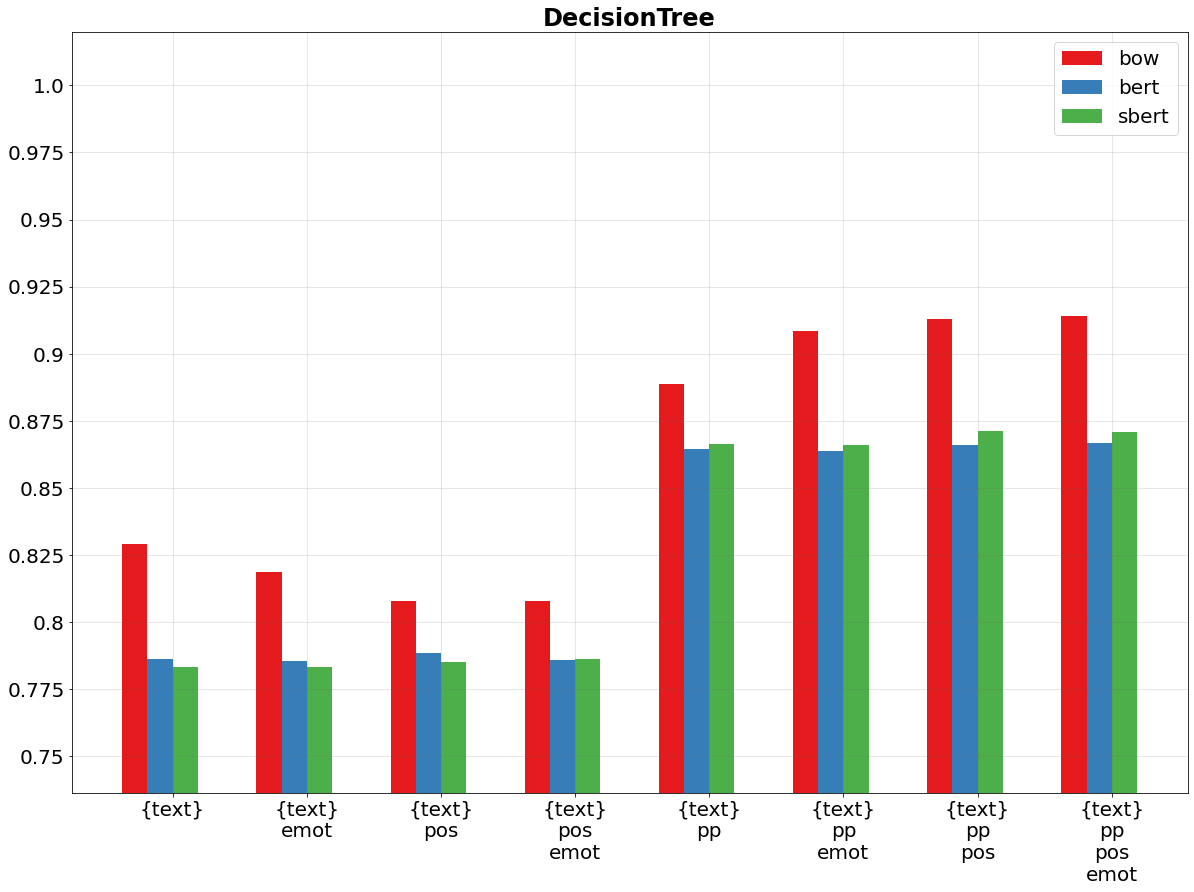

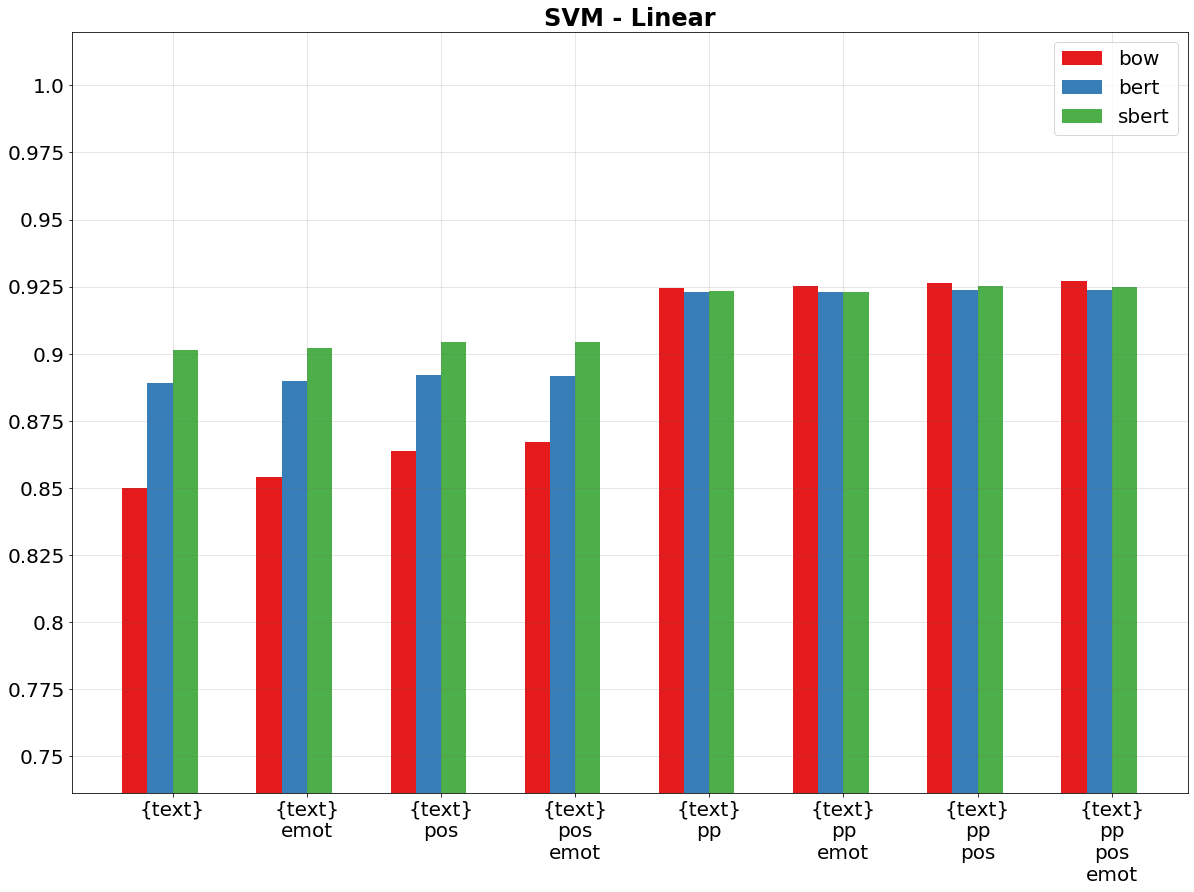

In [24]:
for classifier in set(df_bert['classifier'].unique()) - {'BayesianNetworks'}:
    plot_values = evaluate_bow_vs_bert(classifier, 'accuracy')
    plot_bow_vs_bert(plot_values, classifier)

### F1 score
Weighted Average

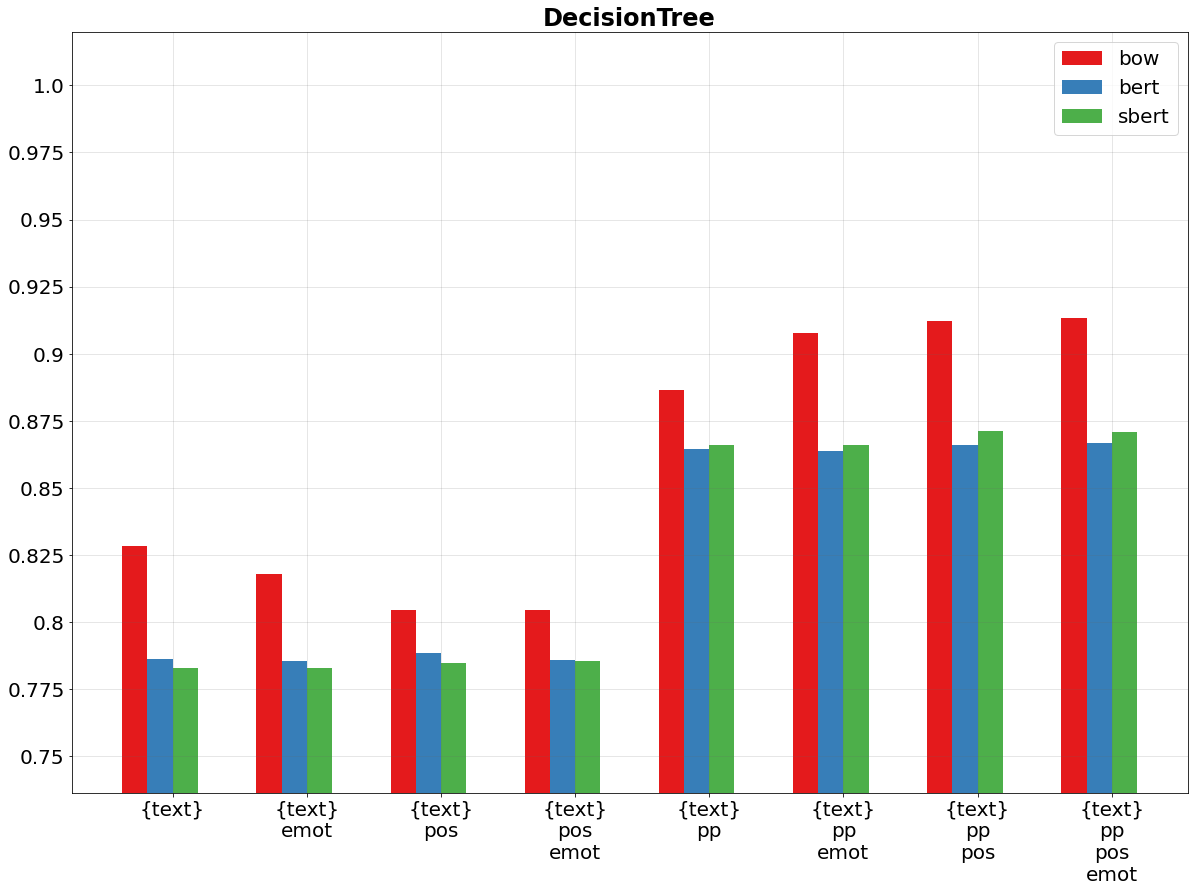

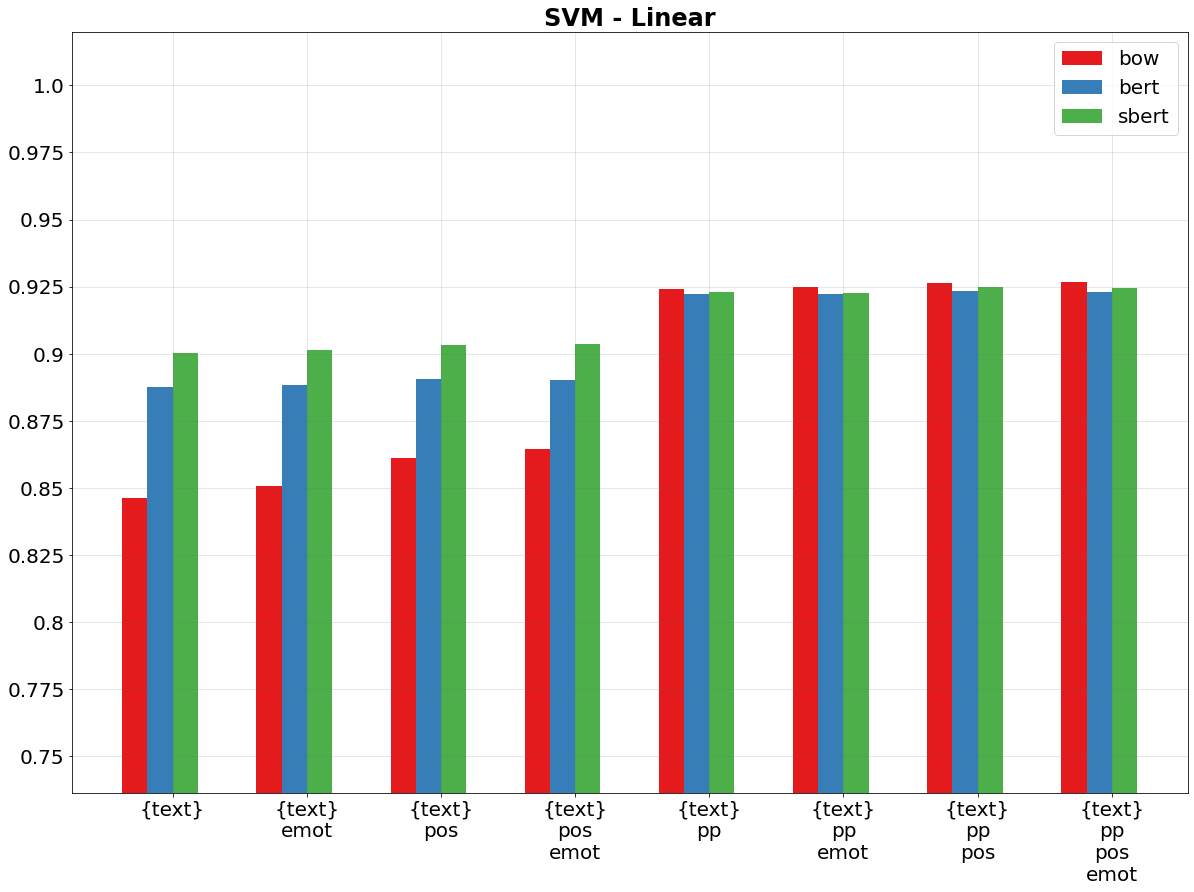

In [25]:
for classifier in set(df_bert['classifier'].unique()) - {'BayesianNetworks'}:
    plot_values = evaluate_bow_vs_bert(classifier, 'weighted avg.f1-score')
    plot_bow_vs_bert(plot_values, classifier)